<h1 style = "text-align:center; font-size:300%">Walmart Sales Prediction</h1>

---

## Description (Business Problem):

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.


## About Dataset:
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:
* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13



## Objectives:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales.
- Evaluate the models & compare their respective scores.
- Build wep app using 'Streamlit' to display the important insights & deployment the model.

---

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import warnings 
warnings.filterwarnings('ignore')

plt.style.use(style='ggplot')
%matplotlib inline

---

---

# Loading & Inspecting Data

In [2]:
df = pd.read_csv('Walmart_data.csv')
data = df.copy()

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# change float format in data
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
# data distribution
data.describe().round(2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


---

---

# Data Preperation

In [7]:
# rename columns 
data.columns  = data.columns.str.lower()
data.rename({'holiday_flag': 'is_holiday'}, axis = 1, inplace = True)
data.columns

Index(['store', 'date', 'weekly_sales', 'is_holiday', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [8]:
# correct data format of the 'date' column
data['date'] = pd.to_datetime(data['date'])

# reframing the 'date' column
data['year'] = data['date'].dt.year
data['quarter'] = data['date'].dt.quarter
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.week
data['weekday'] = data['date'].dt.weekday

# display a data sample
data.sample(3)

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,quarter,month,week,weekday
1455,11,2010-07-30,"1,250,179",0,83,3,215,7,2010,3,7,30,4
4453,32,2010-06-25,"1,124,764",0,72,3,189,9,2010,2,6,25,4
5559,39,2012-06-29,"1,492,389",0,86,3,221,7,2012,2,6,26,4


In [9]:
# cheak missing values
data.isnull().sum()

store           0
date            0
weekly_sales    0
is_holiday      0
temperature     0
fuel_price      0
cpi             0
unemployment    0
year            0
quarter         0
month           0
week            0
weekday         0
dtype: int64

**Conclusion:** The dataset doesn't have any missing values

In [10]:
# Check Duplicate Values
data.duplicated().sum()

0

**Conclusion:** The dataset doesn't have any duplicate values

In [11]:
# save the dataframe
data.to_csv('modified_data.csv')

---

---

# Exploratory Data Analysis (EDA)

* Univariate Analysis
* Bi-variate Analysis
* Time Series Analysis

## Univariate Analysis

### 1. Numerical Features

- weekly_sales
- temperature
- fuel_price
- unemployment
- cpi

In [12]:
data[['weekly_sales', 'temperature', 'fuel_price', 'unemployment', 'cpi']].describe()

,weekly_sales,temperature,fuel_price,unemployment,cpi
count,"6,435","6,435","6,435","6,435","6,435"
mean,"1,046,965",61,3,8,172
std,"564,367",18,0,2,39
min,"209,986",-2,2,4,126
25%,"553,350",47,3,7,132
50%,"960,746",63,3,8,183
75%,"1,420,159",75,4,9,213
max,"3,818,686",100,4,14,227


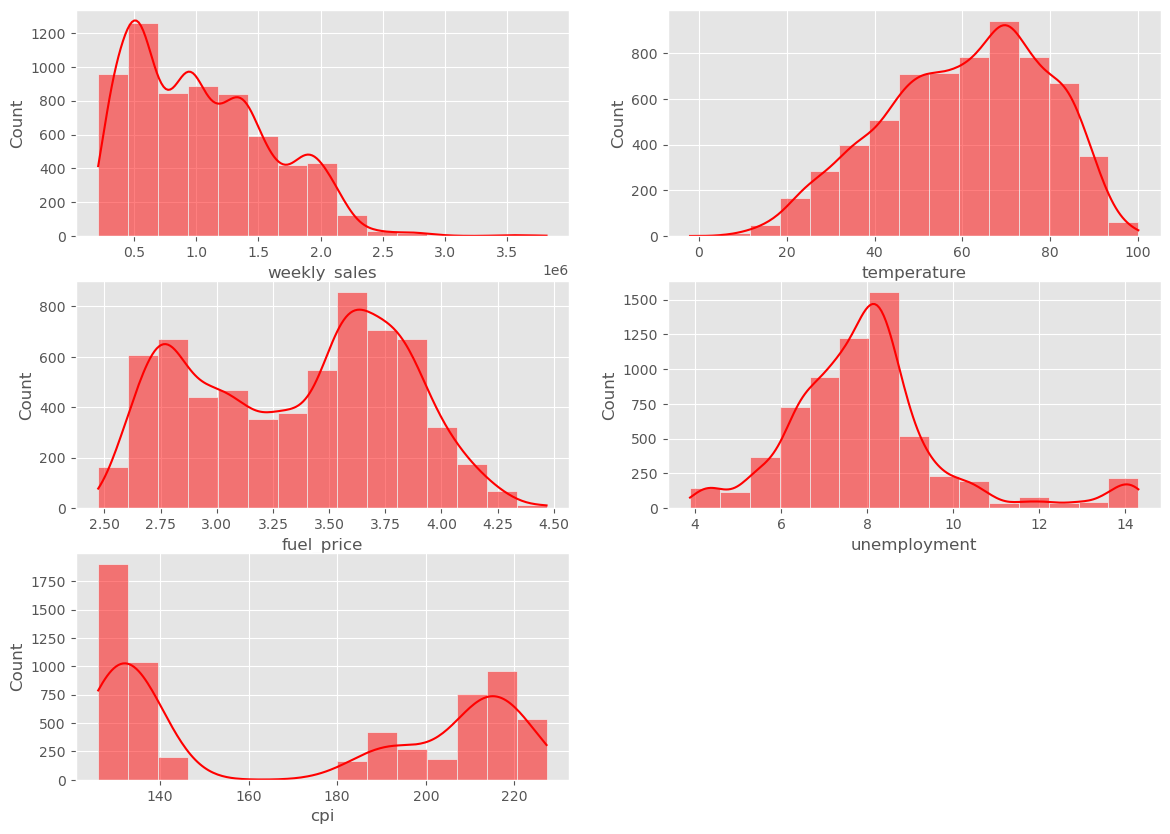

In [13]:
columns = ['weekly_sales', 'temperature', 'fuel_price', 'unemployment', 'cpi'] 
plt.figure(figsize=(14,10))
for i,col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = data, x = col, kde = True, bins = 15, color = 'r')
plt.show()

### 2. categorical Features

- is_holiday
- year
- quarter
- month	week
- day
- weekday

In [14]:
data[['store', 'is_holiday', 'year', 'month', 'week', 'weekday']].nunique().sort_values()

is_holiday     2
year           3
weekday        7
month         12
store         45
week          52
dtype: int64

### 2-1. is_holiday

In [15]:
d = data['is_holiday'].value_counts()
d

0    5985
1     450
Name: is_holiday, dtype: int64

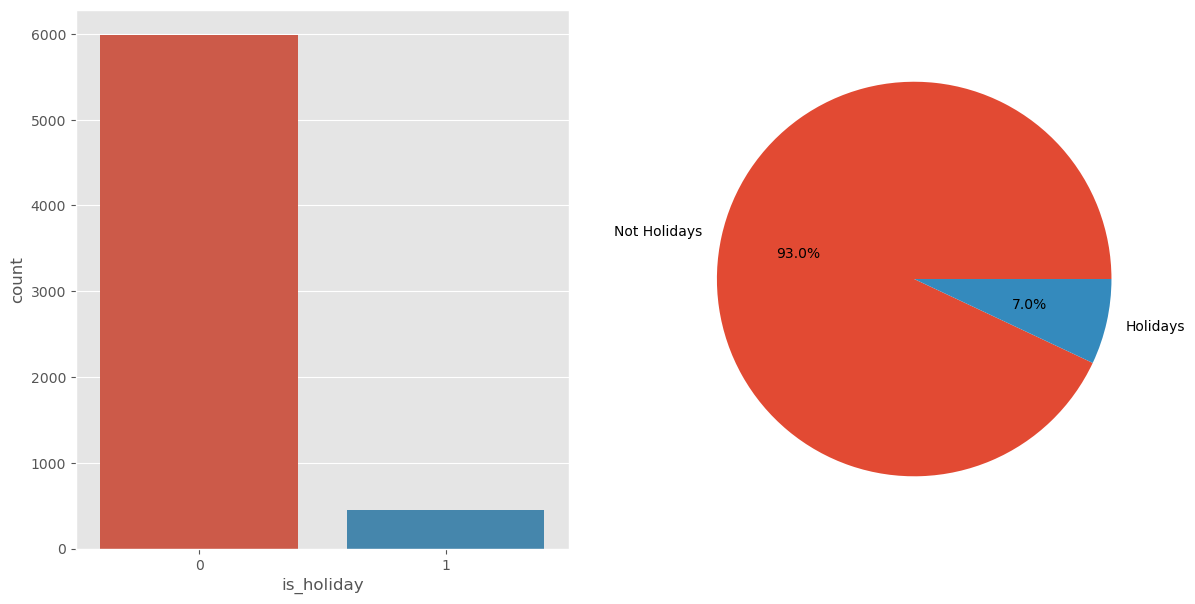

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
sns.countplot(data = data, x = 'is_holiday', ax = ax[0])
ax[1].pie(data['is_holiday'].value_counts().values, 
          labels = ['Not Holidays', 'Holidays'],
          autopct = '%1.1f%%')
plt.show()

In [17]:
data['year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: year, dtype: int64

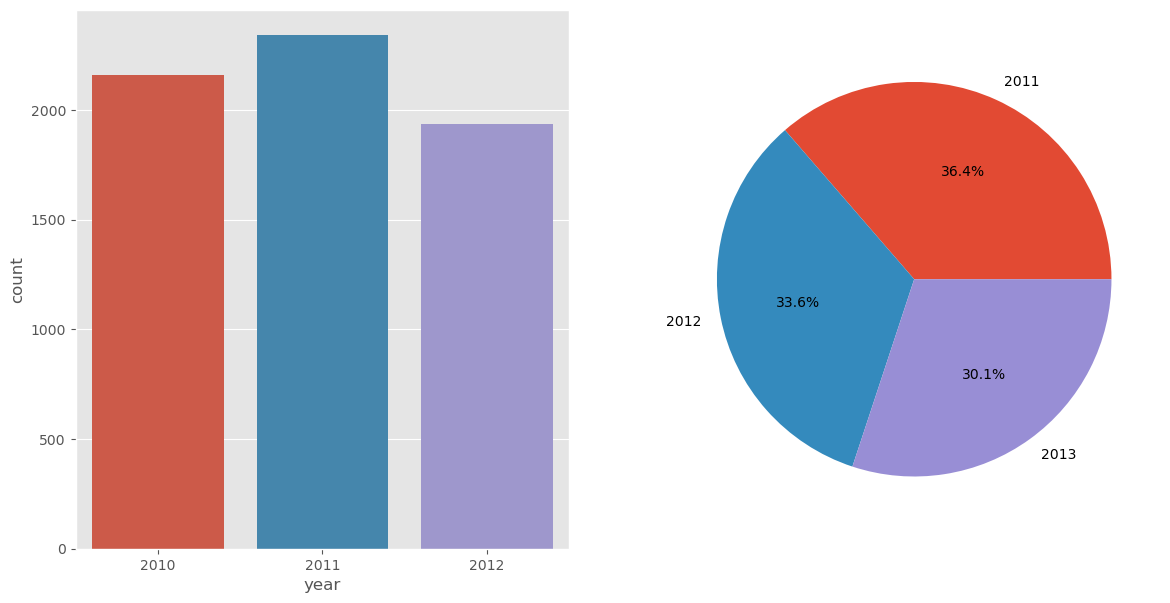

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
sns.countplot(data = data, x = 'year', ax = ax[0])
ax[1].pie(data['year'].value_counts().values, 
          labels = ['2011', '2012', '2013'], 
          autopct = '%1.1f%%')
plt.show()

### 2.3- quarter

In [19]:
data['quarter'].value_counts()

2    1755
3    1710
4    1485
1    1485
Name: quarter, dtype: int64

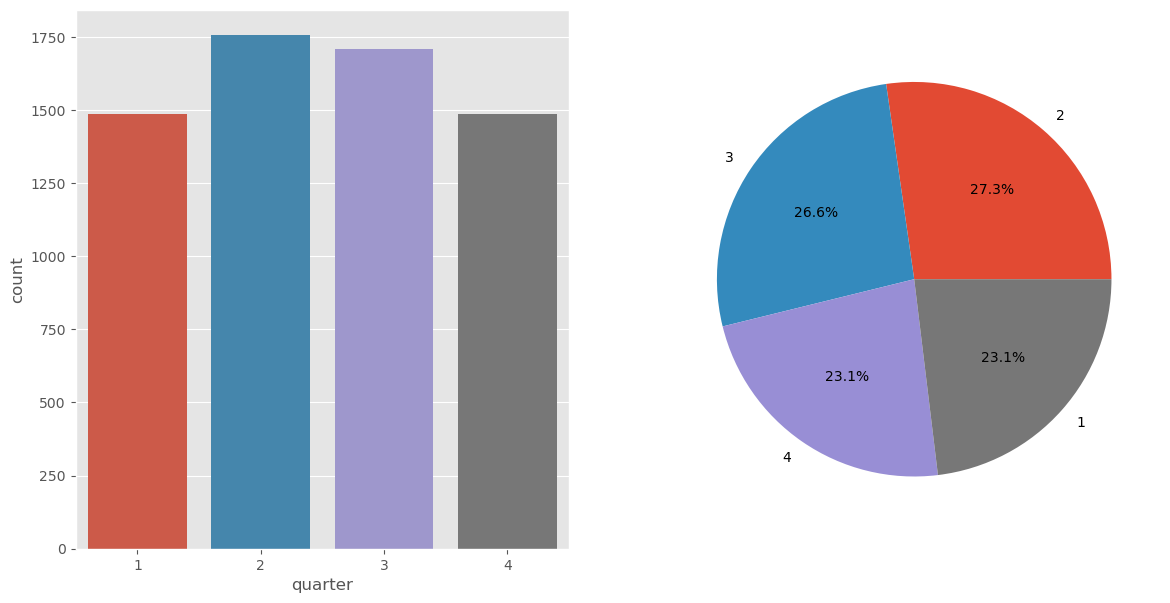

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
sns.countplot(data = data, x = 'quarter', ax = ax[0])
ax[1].pie(data['quarter'].value_counts().values, 
          labels = ['2', '3', '4', '1'], 
          autopct = '%1.1f%%')
plt.show()

### 2.4- month

In [21]:
data['month'].value_counts()

4     630
5     585
9     585
7     585
10    585
3     540
6     540
8     540
12    495
2     495
1     450
11    405
Name: month, dtype: int64

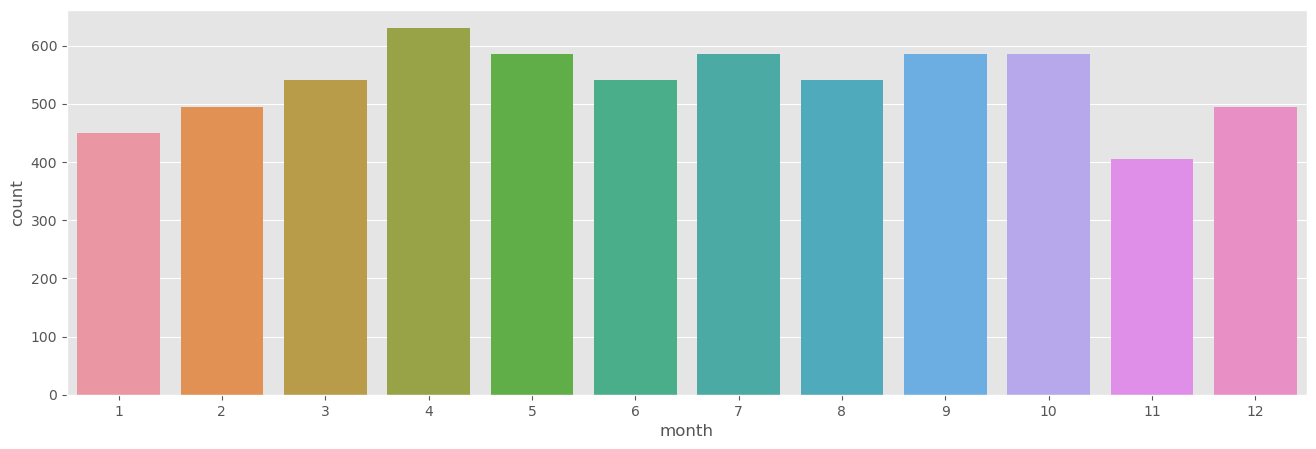

In [22]:
plt.figure(figsize=(16,5))
sns.countplot(data = data, x = 'month')
plt.show()

### 2.5- store

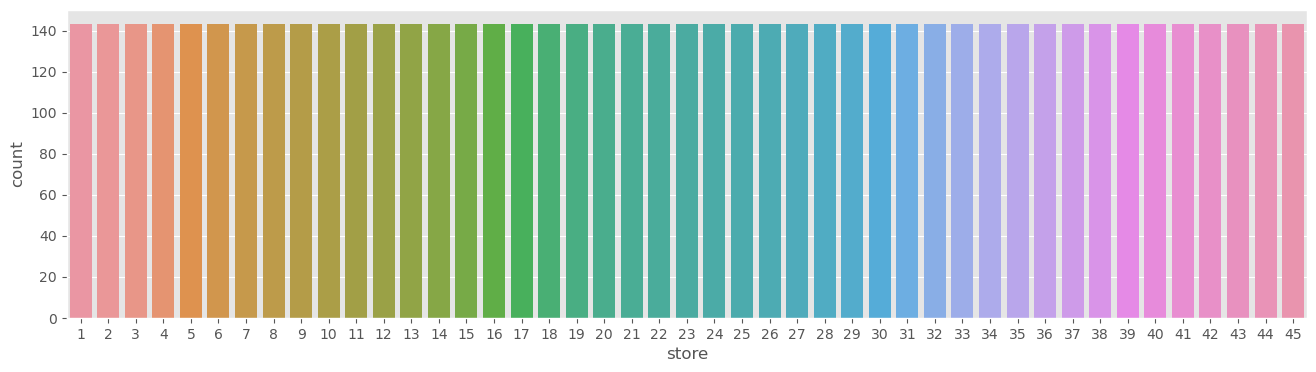

In [23]:
plt.figure(figsize=(16,4))
sns.countplot(data = data, x = 'store')
plt.show()

**Conclusion:** There are no categorical features in the dataset.

## Bi-variate Analysis

### 1. weekly_sales & is_holiday

#### Q1: What are the average sales on holidays and regular days?  

In [24]:
gb1 = data.groupby('is_holiday').mean()['weekly_sales']
gb1

is_holiday
0   1,041,256
1   1,122,888
Name: weekly_sales, dtype: float64

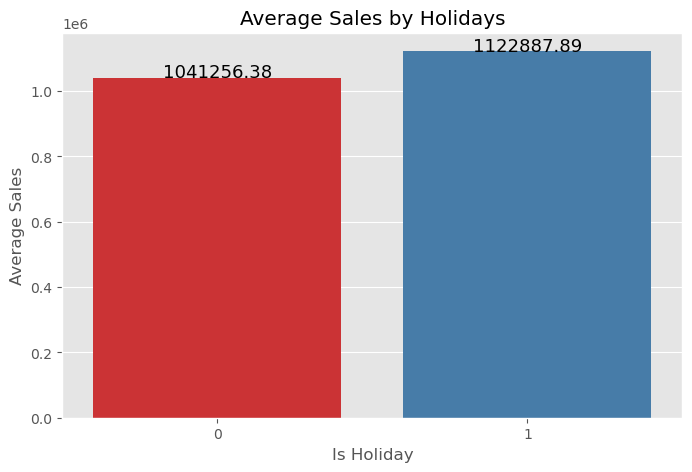

In [25]:
plt.figure(figsize = (8, 5))
sns.barplot(data = data, 
            x = 'is_holiday',
            y = 'weekly_sales',
            palette = 'Set1',
            estimator = np.mean,
            ci = False)

# Add labels to each bar
for i, val in enumerate(gb1.values):
    plt.text(i, val, "{:.2f}".format(val), ha = 'center', fontsize = 13)

# Add labels and title
plt.title('Average Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Average Sales', size = 12)
plt.show()

**Conclusion:** Average sales on holidays are higher than on regular days.

#### Q2: What are the total sales on holidays and regular days?

In [26]:
gb2 = data.groupby('is_holiday').sum()['weekly_sales']
gb2

is_holiday
0   6,231,919,436
1     505,299,552
Name: weekly_sales, dtype: float64

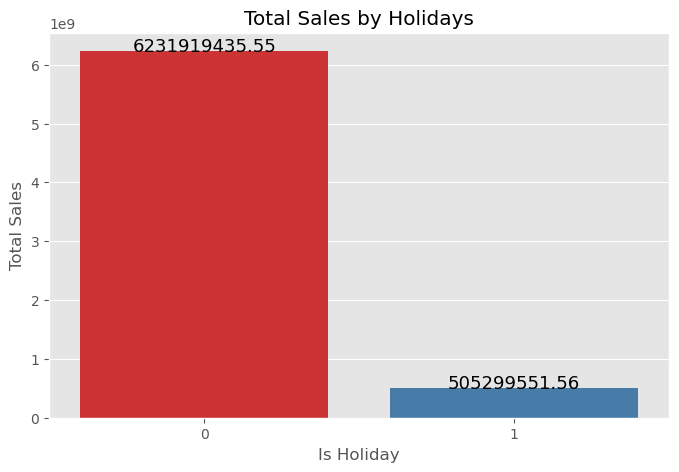

In [27]:
plt.figure(figsize = (8, 5))
sns.barplot(data = data, 
            x = 'is_holiday',
            y = 'weekly_sales',
            palette = 'Set1',
            estimator = np.sum, 
            ci = False)

# Add labels to each bar
for i, val in enumerate(gb2.values):
    plt.text(i, val, "{:.2f}".format(val), ha = 'center', fontsize = 13)

# Add labels and title
plt.title('Total Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Total Sales', size = 12)
plt.show()

**Conclusion:** Total sales on regular days are higher than on holidays, which is normal because the number of holidays is very small compared with the number of regular days.

### 2. weekly_sales & store

#### Q3: What are the total sales in each store?

In [28]:
gb3 = data.groupby('store').sum()['weekly_sales'].sort_values(ascending = False)

# convert the groupby object to a dataframe
gb3 = gb3.reset_index()

# display the largest 10 values
gb3.head(10)

,store,weekly_sales
0,20,"301,397,792"
1,4,"299,543,953"
2,14,"288,999,911"
3,13,"286,517,704"
4,2,"275,382,441"
5,10,"271,617,714"
6,27,"253,855,917"
7,6,"223,756,131"
8,1,"222,402,809"
9,39,"207,445,542"


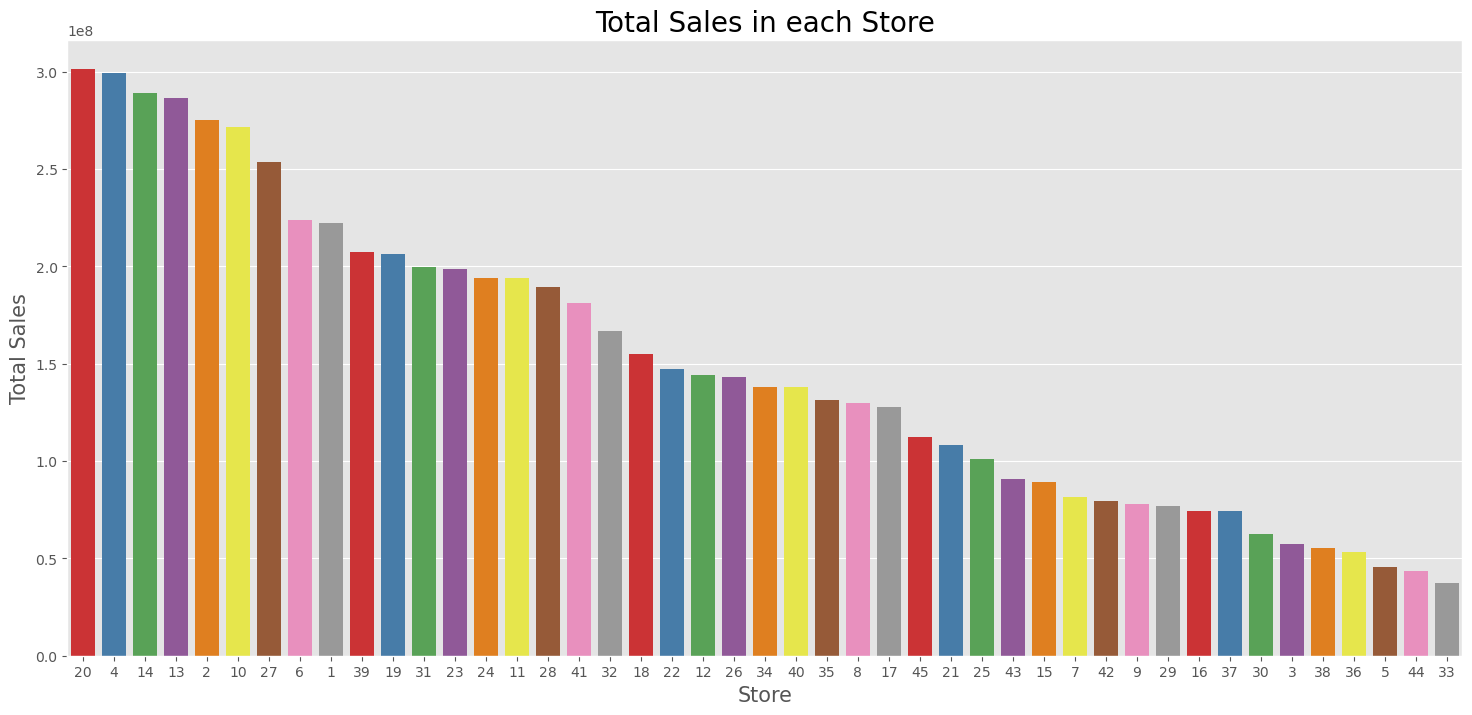

In [29]:
plt.figure(figsize = (18, 8))
sns.barplot(data = gb3, 
            x = 'store',
            y = 'weekly_sales',
            palette = 'Set1', 
            order = gb3['store'])

# Add labels and title
plt.title('Total Sales in each Store', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

**Conclusion:** Store No. 20 has the highest sales from any store with 301,397,792 followed by Store No. 4 with 299,543,953 and Store No. 33 comes last with 37,160,222$.

### 3. weekly_sales & temperature

#### Q4: What happens to sales in the different temperatures?

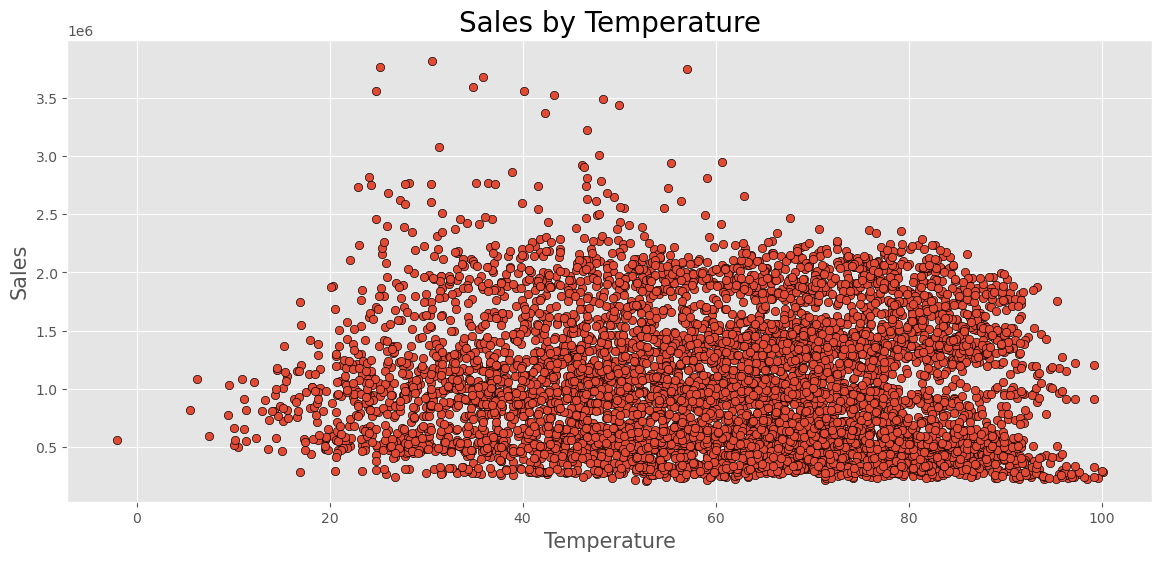

In [30]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data = data, 
                x = 'temperature', 
                y = 'weekly_sales',
                edgecolor = "black")

# Add labels and title
plt.title('Sales by Temperature', size = 20)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

**Conclusion:** Sales are not affected by changes in temperature.

### 4. weekly_sales & fule_price

#### Q5: What happens to sales with an increase in fuel price?

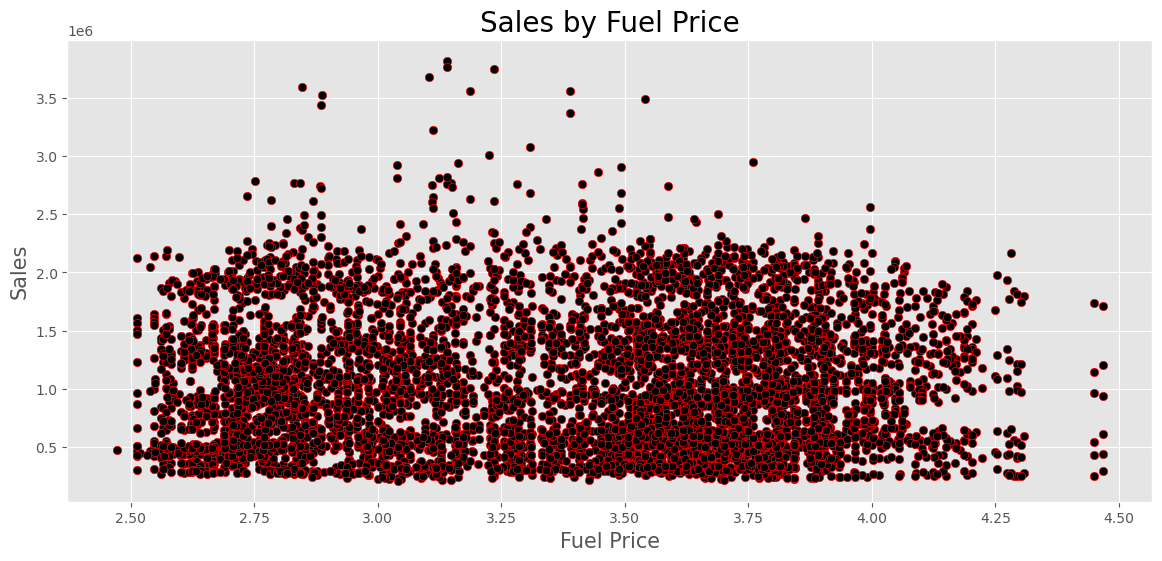

In [31]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data = data, 
                x = 'fuel_price', 
                y = 'weekly_sales',
                color = 'black',
                edgecolor = "red")

# Add labels and title
plt.title('Sales by Fuel Price', size = 20)
plt.xlabel('Fuel Price', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

**Conclusion:** Sales are not affected by an increase in fuel price.

### 5. weekly_sales & cpi

#### Q6: What happens to sales based on Consumer Price Index (CPI) or the consumer's economic condition?

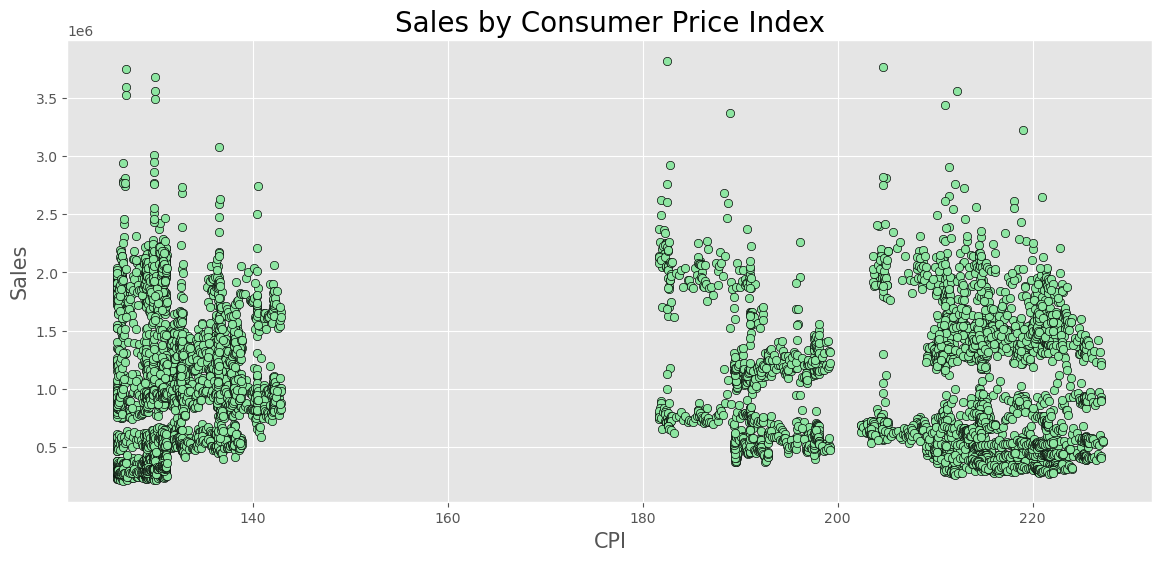

In [32]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data = data, 
                x = 'cpi', 
                y = 'weekly_sales',
                color = '#8de5a1',
                edgecolor = "black")

# Add labels and title
plt.title('Sales by Consumer Price Index', size = 20)
plt.xlabel('CPI', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

**Conclusion:** Consumer Price Index (CPI) does not affect sales. And based on the distribution of average consumer prices in the above figure, customers can be divided into two categories:
- customers who pay from 120 to 150 (Middle-class customers).
- customers who pay from 180 to 230 (High-class customers).

### 6. weekly_sales & unemployment

#### Q7: What happens to sales based on the unemployment rate?

In [33]:
print(f"The Highest Unemployment Rate {data['unemployment'].max()}")
print(f"The Lowest Unemployment Rate  {data['unemployment'].min()}")

The Highest Unemployment Rate 14.313
The Lowest Unemployment Rate  3.879


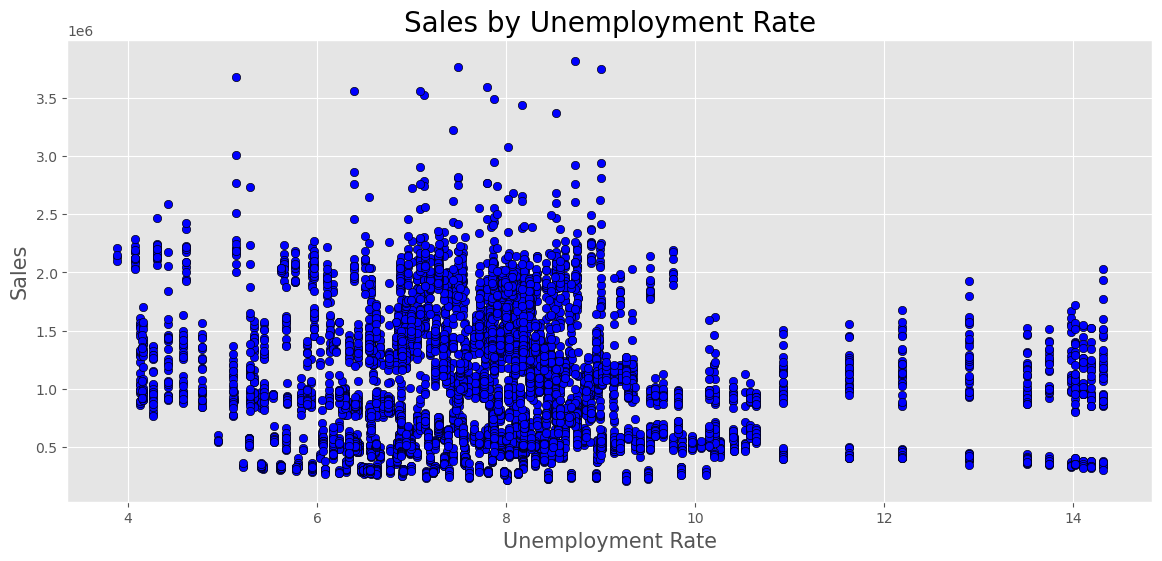

In [34]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data = data, 
                x = 'unemployment', 
                y = 'weekly_sales',
                color = 'blue', 
                edgecolor = 'black')

# Add labels and title
plt.title('Sales by Unemployment Rate', size = 20)
plt.xlabel('Unemployment Rate', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

**Conclusion:** Sales are affected by the unemployment rate, so the higher the unemployment rate, the lower the sales.

## Time Series Analysis

#### Q8: What are the total sales in each year?

In [35]:
gp4 = data.groupby('year').sum()['weekly_sales'].sort_values(ascending = False)
gp4

year
2011   2,448,200,007
2010   2,288,886,120
2012   2,000,132,859
Name: weekly_sales, dtype: float64

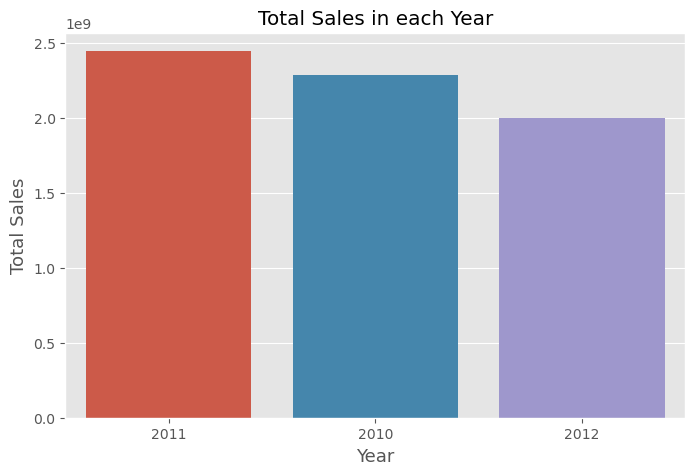

In [36]:
plt.figure(figsize = (8, 5))
sns.barplot(data = data, 
            x = 'year',
            y = 'weekly_sales',
            estimator = np.sum,
            order = gp4.index,
            ci = False)

# Add labels and title
plt.title('Total Sales in each Year')
plt.xlabel('Year', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

**Conclusion:** Total sales in 2011 are the highest, with 2,448,200,007$.

#### Q9: What are the total sales in each quarter?

In [37]:
gp5 = data.groupby('quarter').sum()['weekly_sales'].sort_values(ascending = False)
gp5

quarter
2   1,826,038,446
3   1,748,077,900
4   1,661,164,284
1   1,501,938,358
Name: weekly_sales, dtype: float64

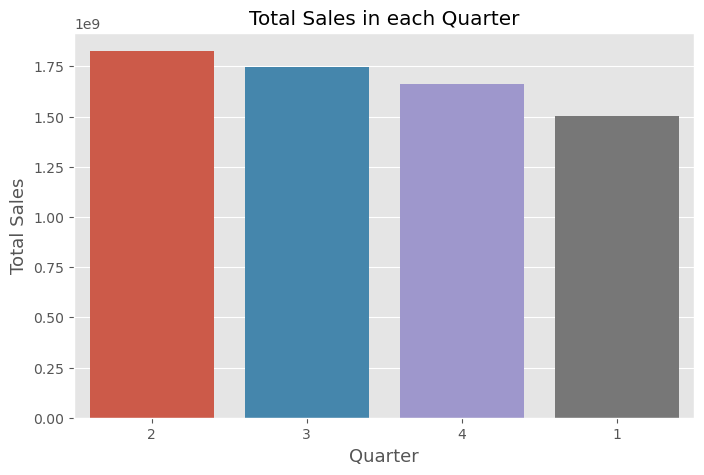

In [38]:
plt.figure(figsize = (8, 5))
sns.barplot(data = data, 
            x = 'quarter',
            y = 'weekly_sales',
            estimator = np.sum,
            order = gp5.index,
            ci = False)

# Add labels and title
plt.title('Total Sales in each Quarter')
plt.xlabel('Quarter', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

**Conclusion:** Total sales for all years in quarter 2 (Spring season) are the highest from all quarter, with 1,826,038,446$.

#### Q10: What are the total sales in each month?

In [39]:
gp6 = data.groupby('month').sum()['weekly_sales'].sort_values(ascending = False)
gp6

month
4    645,323,890
5    605,696,592
10   602,918,857
12   599,076,091
7    593,313,937
9    590,532,263
6    575,017,964
8    564,231,700
3    553,486,410
2    522,025,683
11   459,169,336
1    426,426,265
Name: weekly_sales, dtype: float64

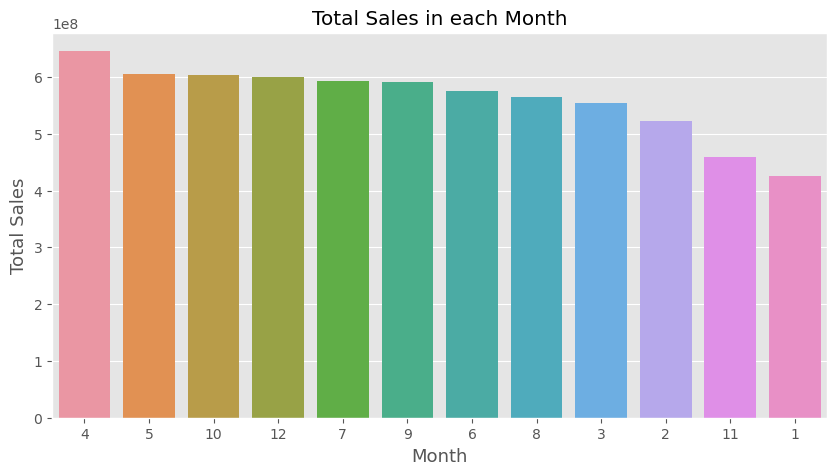

In [40]:
plt.figure(figsize = (10, 5))
sns.barplot(data = data, 
            x = 'month',
            y = 'weekly_sales',
            estimator = np.sum,
            order = gp6.index,
            ci = False)

# Add labels and title
plt.title('Total Sales in each Month')
plt.xlabel('Month', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

**Conclusion:** Total sales for all years in month 4 (April) are the highest from any month, with 645,323,890$.

#### Q11: What are the total sales in each week?

In [41]:
gp7 = data.groupby('week').sum()['weekly_sales'].sort_values(ascending = False)
gp7

week
41   190,594,515
37   186,661,873
28   186,189,621
15   185,441,801
19   184,124,846
1    181,559,036
17   180,702,699
50   168,035,010
51   157,929,657
23   152,960,337
7    147,190,215
5    146,202,351
10   144,589,185
24   143,481,719
40   143,313,540
36   142,143,211
33   141,332,753
32   141,218,564
21   140,943,423
34   140,774,012
25   140,161,416
44   139,790,059
16   138,483,674
13   138,406,577
11   136,762,806
29   136,222,804
20   135,990,645
43   135,002,768
42   134,008,034
8    133,865,938
47   132,414,608
30   132,410,793
12   132,003,955
38   128,431,158
14    97,312,741
27    95,714,932
45    95,400,104
18    94,886,937
9     94,857,602
6     94,767,180
35    94,524,930
48    94,262,074
31    93,746,731
49    92,374,370
22    91,817,380
46    91,564,565
26    89,372,900
52    86,474,980
39    85,930,730
3     82,735,645
2     82,696,757
4     79,434,828
Name: weekly_sales, dtype: float64

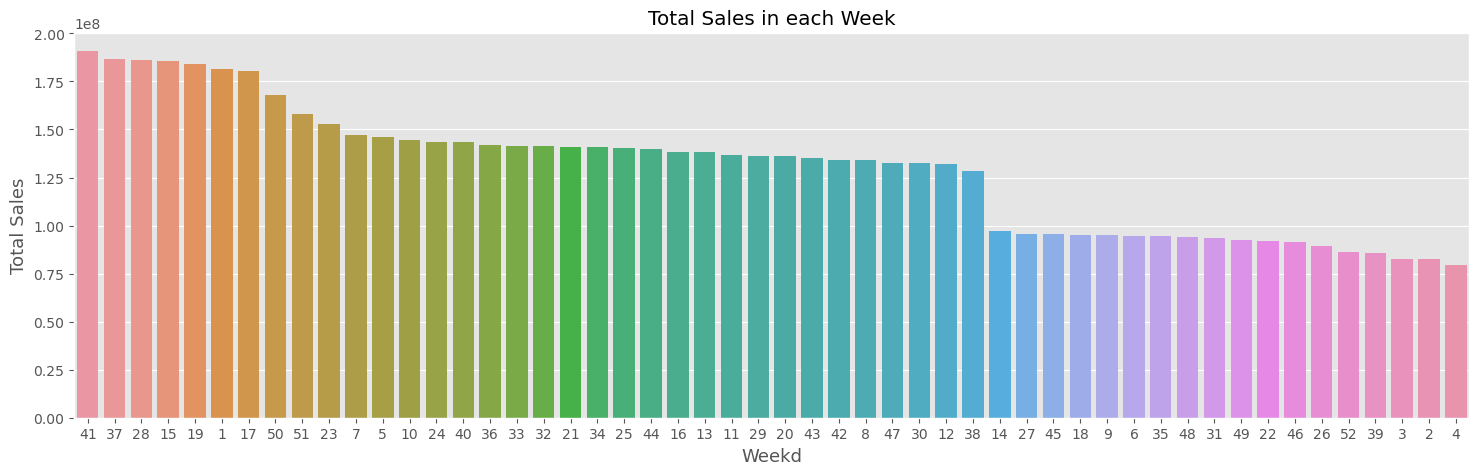

In [42]:
plt.figure(figsize = (18, 5))
sns.barplot(data = data, 
            x = 'week',
            y = 'weekly_sales',
            estimator = np.sum,
            order = gp7.index,
            ci = False)

# Add labels and title
plt.title('Total Sales in each Week')
plt.xlabel('Weekd', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

**Conclusion:** Total sales for all years in week 42 are the highest from any week, with 190,594,515$.

#### Q12: What are the total sales in each weekday?

In [43]:
# "weekday" refers to the day of the week for a given date, represented as an integer where Monday is 0 and Sunday is 6.
gp8 = data.groupby('weekday').sum()['weekly_sales'].sort_values(ascending = False)
gp8

weekday
4   4,486,257,328
0     539,013,251
3     476,624,358
1     433,507,455
6     426,609,076
5     282,494,703
2      92,712,816
Name: weekly_sales, dtype: float64

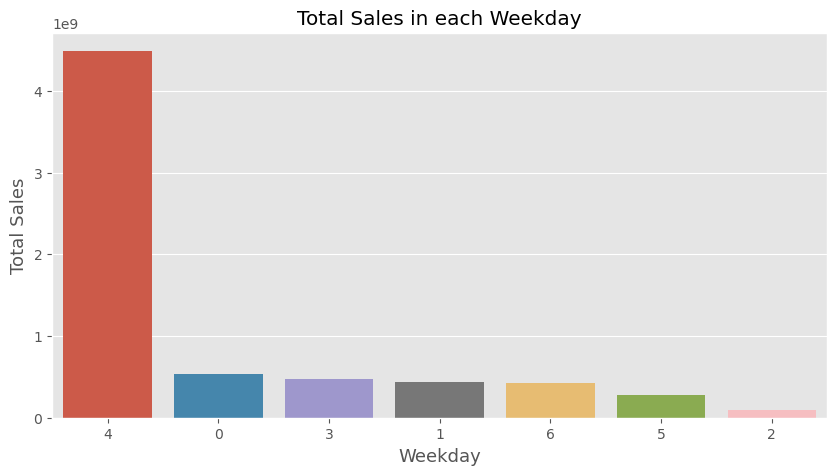

In [44]:
plt.figure(figsize = (10, 5))
sns.barplot(data = data, 
            x = 'weekday',
            y = 'weekly_sales',
            estimator = np.sum,
            order = gp8.index,
            ci = False)

# Add labels and title
plt.title('Total Sales in each Weekday')
plt.xlabel('Weekday', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

**Conclusion:** Total weekly sales for all years on day 4 (Friday) are the highest, with 4,486,257,328$.

#### Q13: What are the total sales in each year regarding the month?

In [45]:
pd.pivot_table(data = data,
               index = 'year', 
               columns = 'month',
               values = 'weekly_sales',
               aggfunc = 'sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,"42,239,876","191,586,881","186,226,221","183,811,789","280,611,884","142,436,082","184,266,356","184,538,086","179,704,061","231,120,142","158,773,134","323,571,609"
2011,"211,965,690","187,609,204","136,520,519","278,969,312","182,801,667","140,193,615","224,461,092","188,081,027","231,032,263","183,719,329","253,470,323","229,375,968"
2012,"172,220,699","142,829,598","230,739,669","182,542,788","142,283,042","292,388,267","184,586,490","191,612,587","179,795,939","188,079,386","46,925,879","46,128,514"


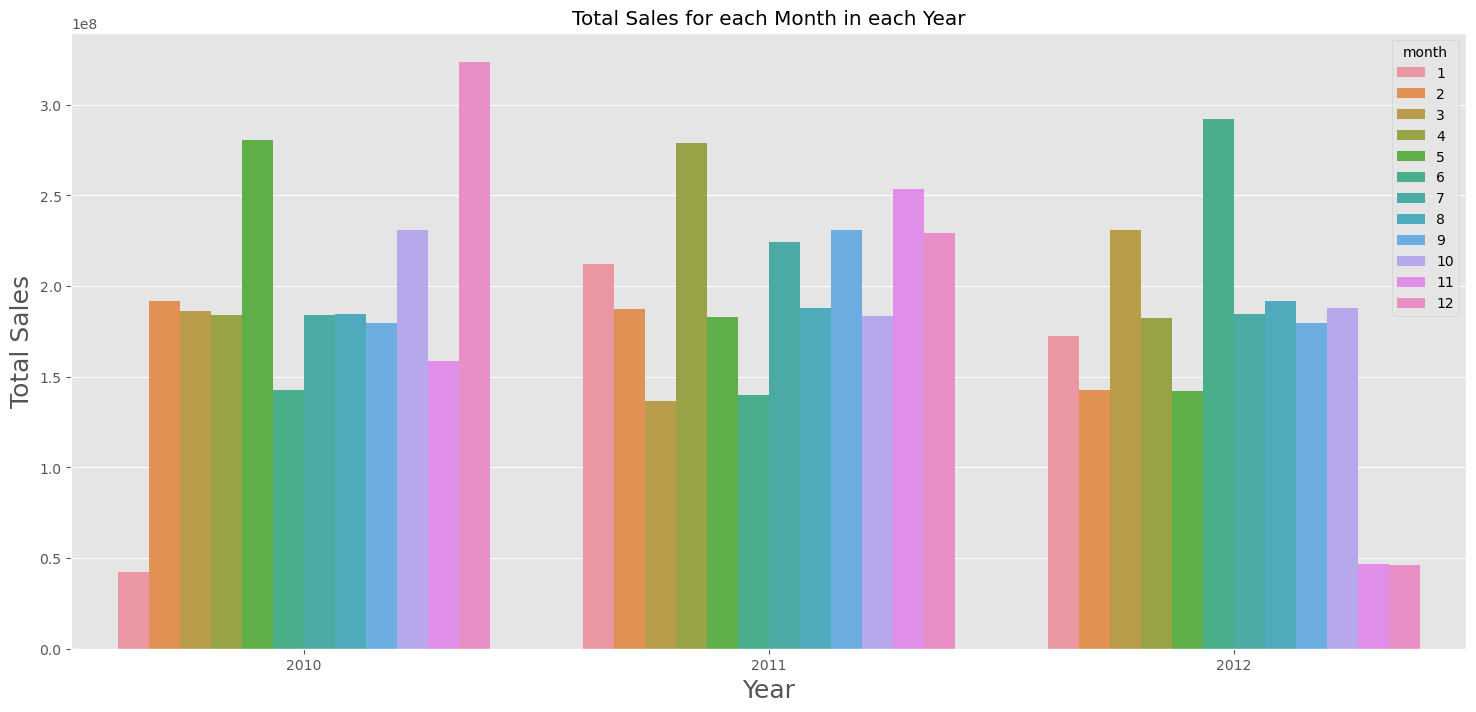

In [46]:
plt.figure(figsize = (18, 8))
sns.barplot(data = data, 
            x = 'year',
            y = 'weekly_sales',
            hue = 'month',
            estimator = np.sum,
           ci = False)

# Add labels and title
plt.title('Total Sales for each Month in each Year')
plt.xlabel('Year', size = 18)
plt.ylabel('Total Sales', size = 18)
plt.show()

**Conclusion:** Total sales in December 2010 are the highest in the three years, where:

- In 2010, total sales in December are the highest with 323,571,609.
- In 2011, total sales in April are the highest with 278,969,312.
- In 2012, total sales in June are the highest with 292,388,267$.

#### Q14: What are the total sales in each year regarding the quarter?

In [47]:
pd.pivot_table(data = data,
               index = 'year', 
               columns = 'quarter',
               values = 'weekly_sales',
               aggfunc = 'sum')

quarter,1,2,3,4
year,,,,
2010,"420,052,978","606,859,755","548,508,502","713,464,886"
2011,"536,095,413","601,964,594","643,574,381","666,565,620"
2012,"545,789,967","617,214,097","555,995,016","281,133,779"


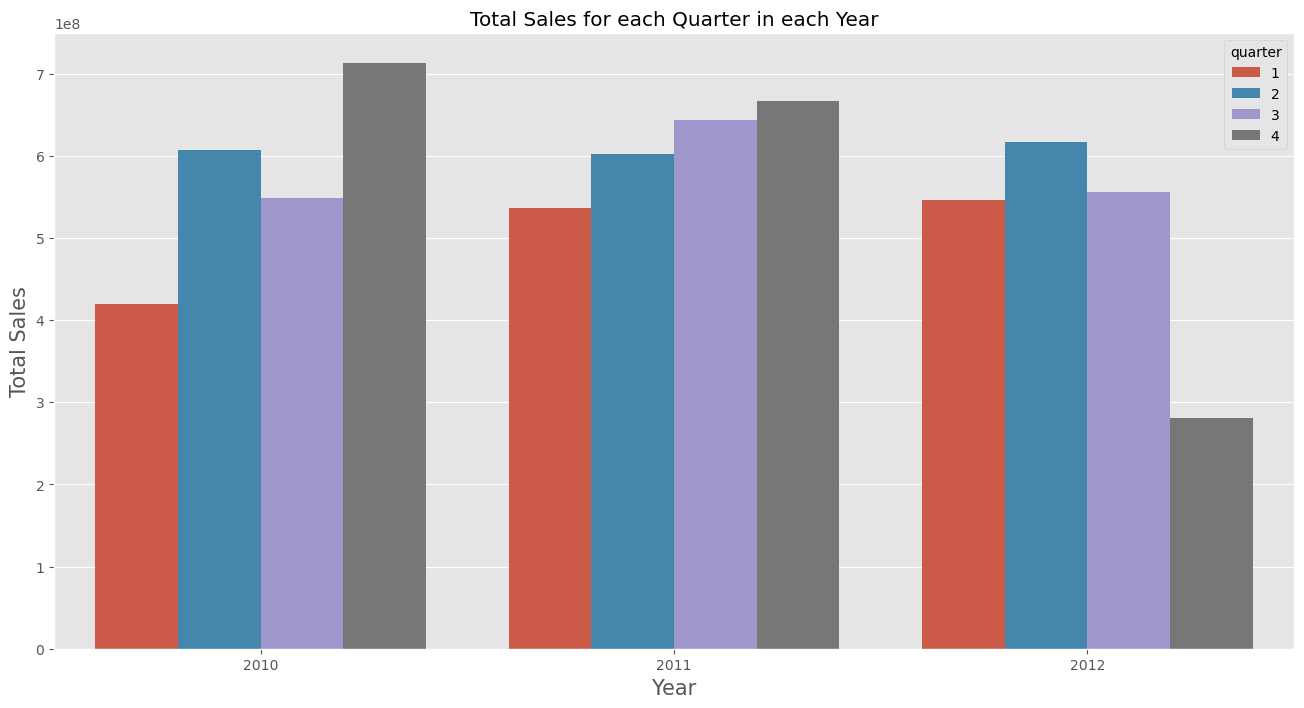

In [48]:
plt.figure(figsize = (16, 8))
sns.barplot(data = data, 
            x = 'year',
            y = 'weekly_sales',
            hue = 'quarter',
            estimator = np.sum,
           ci = False)

# Add labels and title
plt.title('Total Sales for each Quarter in each Year')
plt.xlabel('Year', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

**Conclusion:** Total sales in quarter 4 (Autumn season) in 2010 are the highest in the three years, where:

- In 2010, total sales in quarter 4 (Autumn season) are the highest with 713,464,886.
- In 2011, total sales in quarter 4 (Autumn season) are the highest with 666,565,620.
- In 2012, total sales in quarter 2 (Spring season) are the highest with 281,133,779$.

#### Q15: What happens to the sales over time?

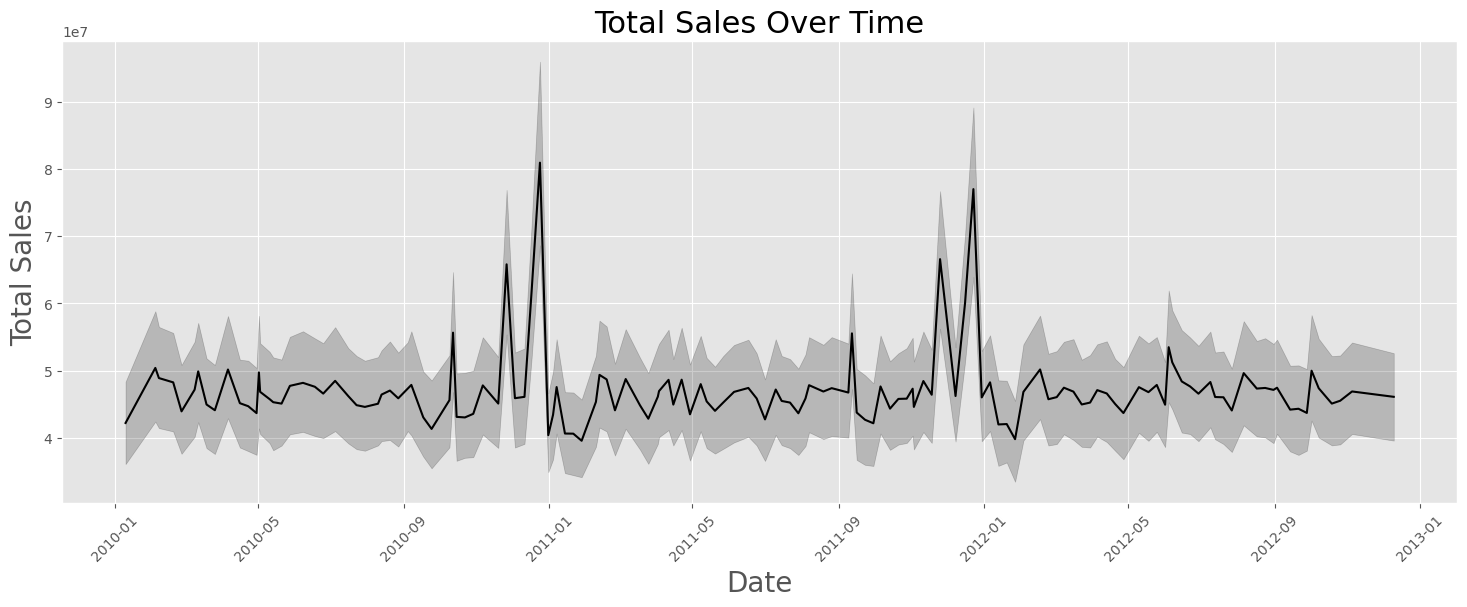

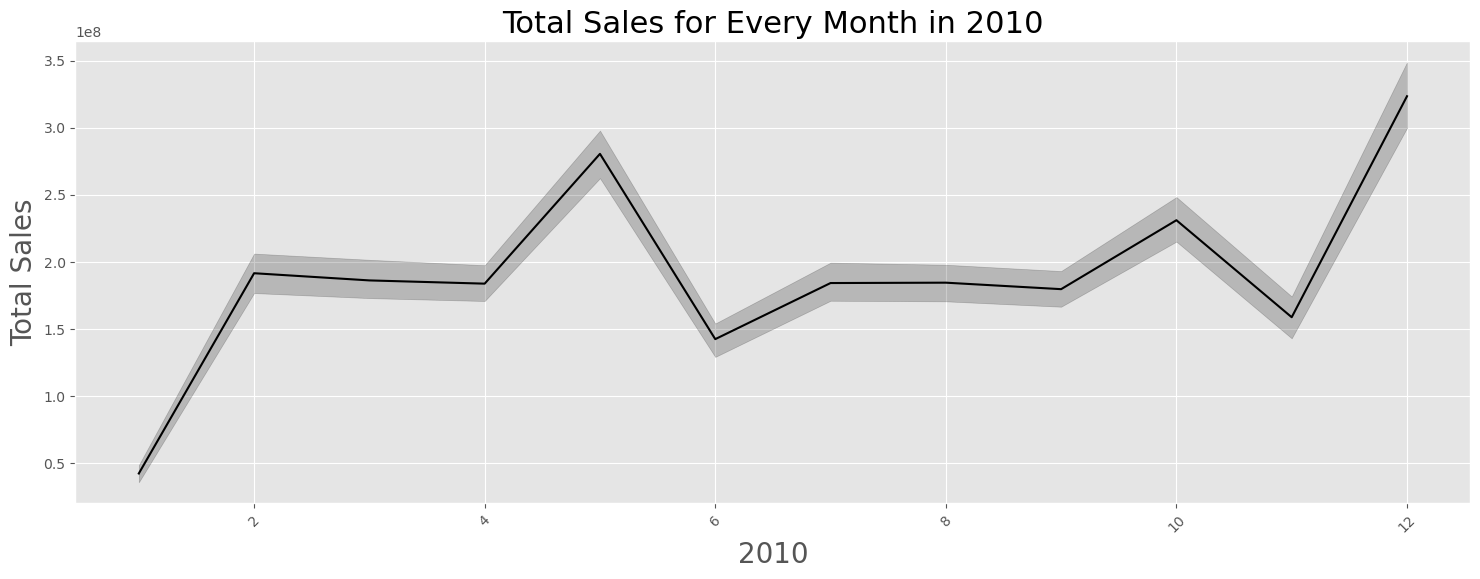

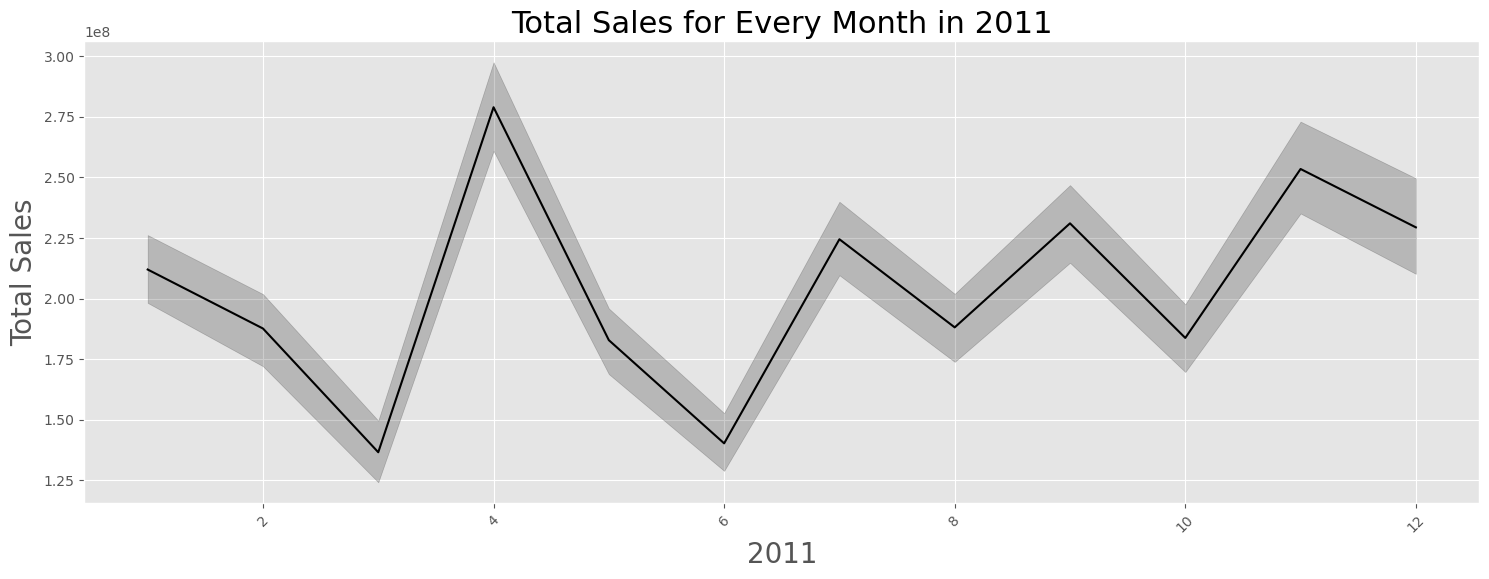

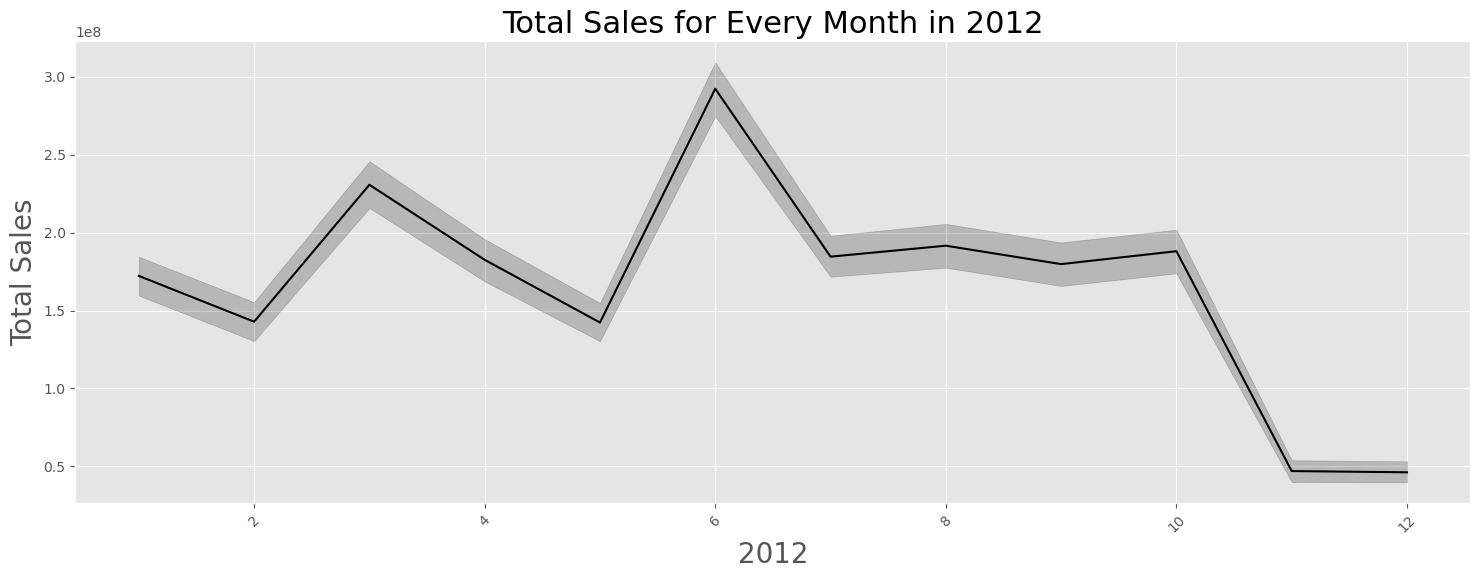

In [49]:
def total_sales_in_each_year(year):
    plt.figure(figsize = (18, 6))
    plt.xticks(rotation = 45)
    sns.lineplot(data = data[data['year'] == year],
                 x = 'month',
                 y = 'weekly_sales',
                 estimator = np.sum,
                 color = 'black')
    # Add labels and title
    plt.title(f'Total Sales for Every Month in {year}', size = 22)
    plt.xlabel(year, size = 20)
    plt.ylabel('Total Sales', size = 20)
    plt.show()
    
    
plt.figure(figsize = (18, 6))
plt.xticks(rotation = 45)
sns.lineplot(data = data,
             x = 'date',
             y = 'weekly_sales',
             color = 'black',
             estimator = np.sum)
# Add labels and title
plt.title('Total Sales Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Total Sales', size = 20)
plt.show()    
    
    
total_sales_in_each_year(2010)
total_sales_in_each_year(2011)
total_sales_in_each_year(2012)

**Conclusion:** Sales are similar in most months, but they increase at the end of 2010 and 2011 and decrease at the end of 2012.

#### Q16: What happens to the unemployment rate over time?

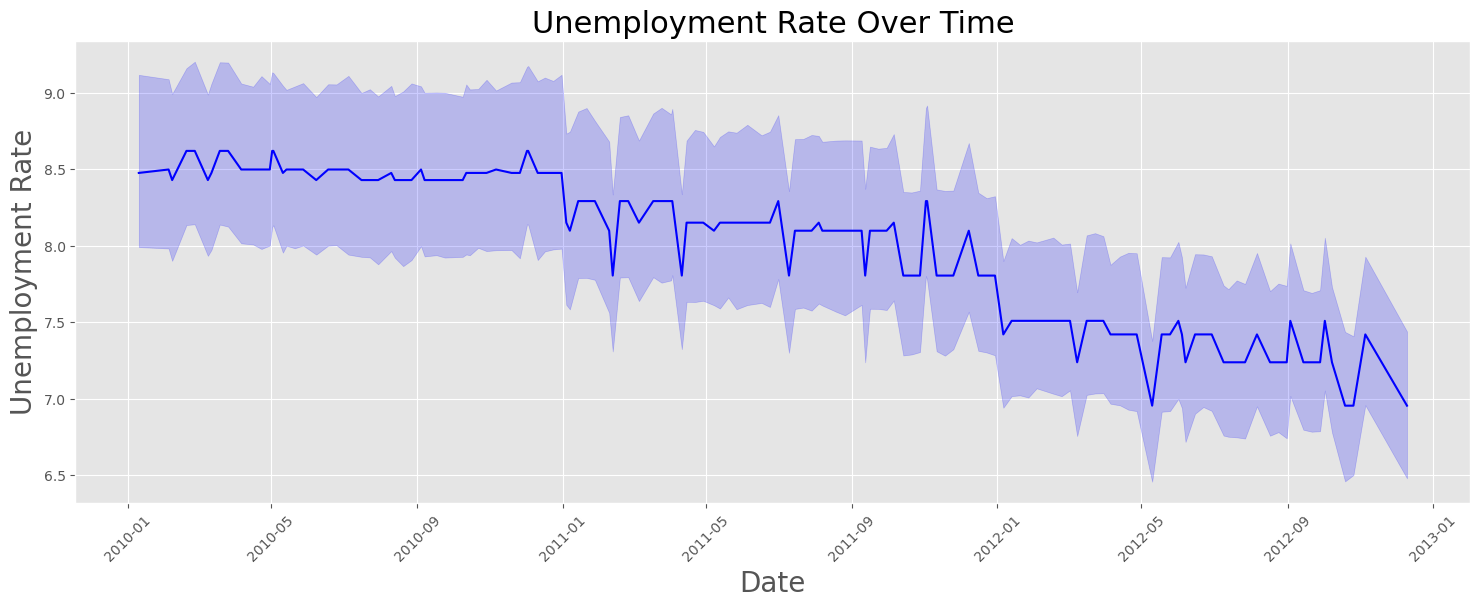

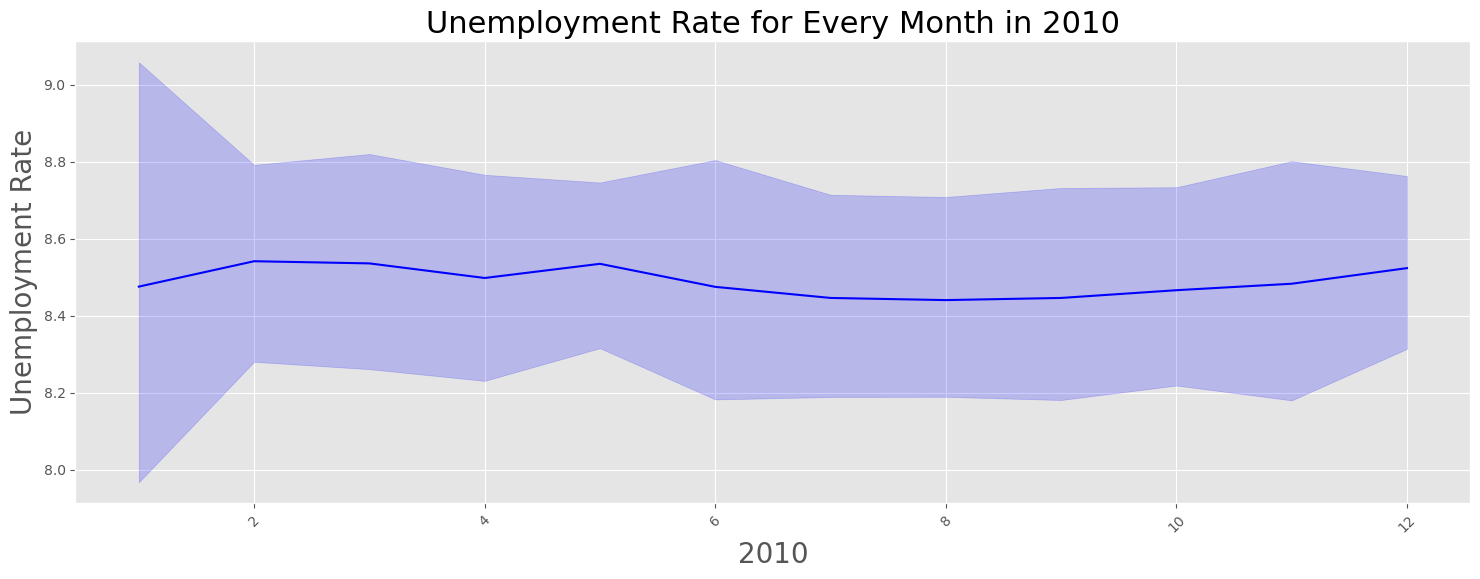

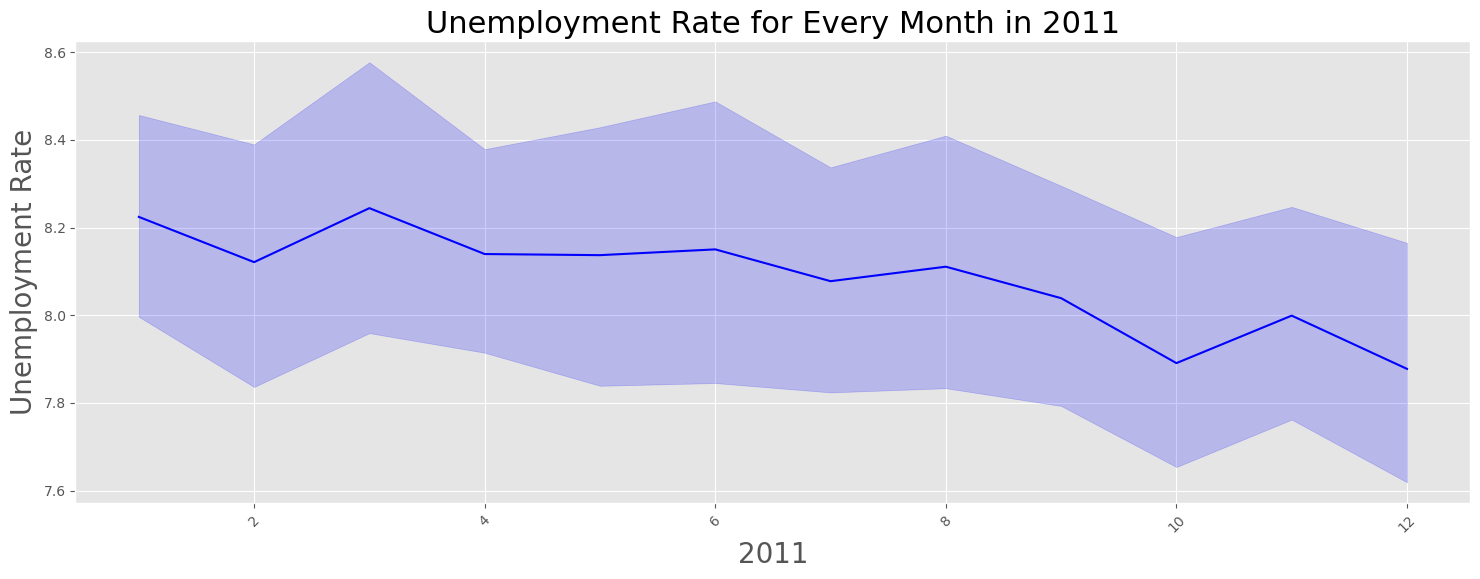

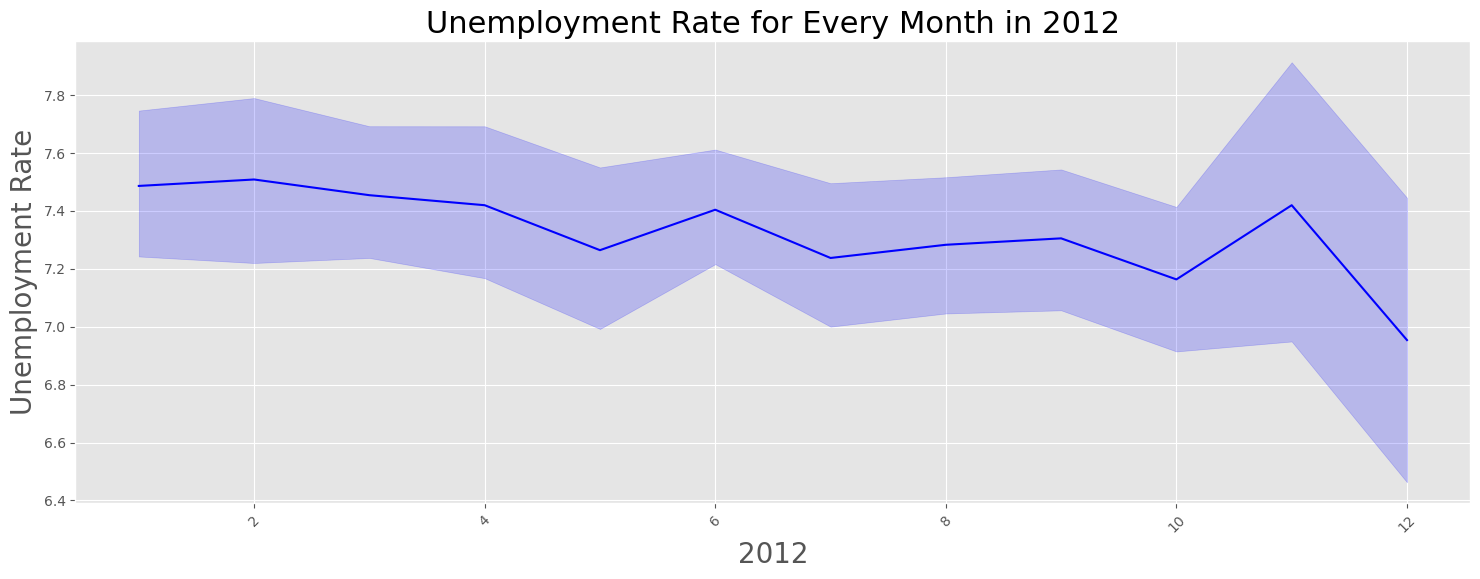

In [50]:
def unemployment_rate_in_each_year(year):
    plt.figure(figsize = (18, 6))
    plt.xticks(rotation = 45)
    sns.lineplot(data = data[data['year'] == year],
                 x = 'month',
                 y = 'unemployment',
                 color = 'b')
    # Add labels and title
    plt.title(f'Unemployment Rate for Every Month in {year}', size = 22)
    plt.xlabel(year, size = 20)
    plt.ylabel('Unemployment Rate', size = 20)
    plt.show()
    

plt.figure(figsize = (18, 6))
plt.xticks(rotation = 45)
sns.lineplot(data = data,
             x = 'date',
             y = 'unemployment',
             color = 'b')
# Add labels and title
plt.title(f'Unemployment Rate Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Unemployment Rate', size = 20)
plt.show()   
    
    
unemployment_rate_in_each_year(2010)
unemployment_rate_in_each_year(2011)
unemployment_rate_in_each_year(2012)

**Conclusion:** The unemployment rate decreases over time.

#### Q17: What happens to the fuel price rate over time?

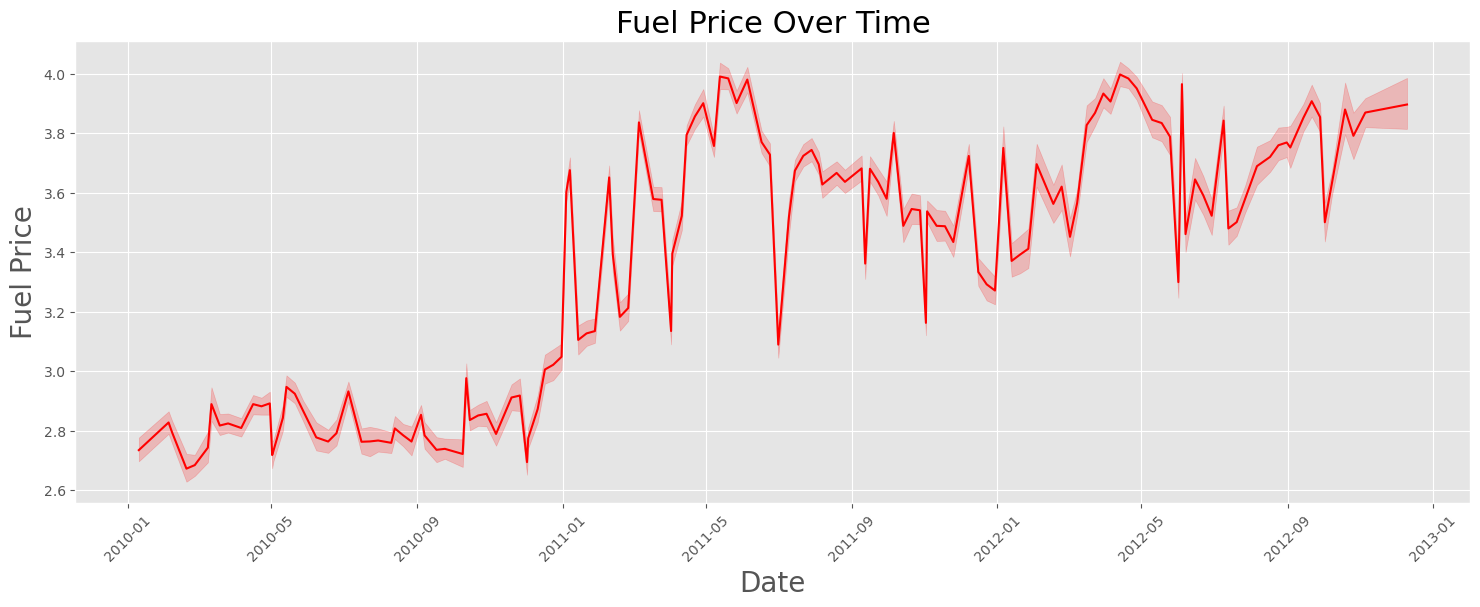

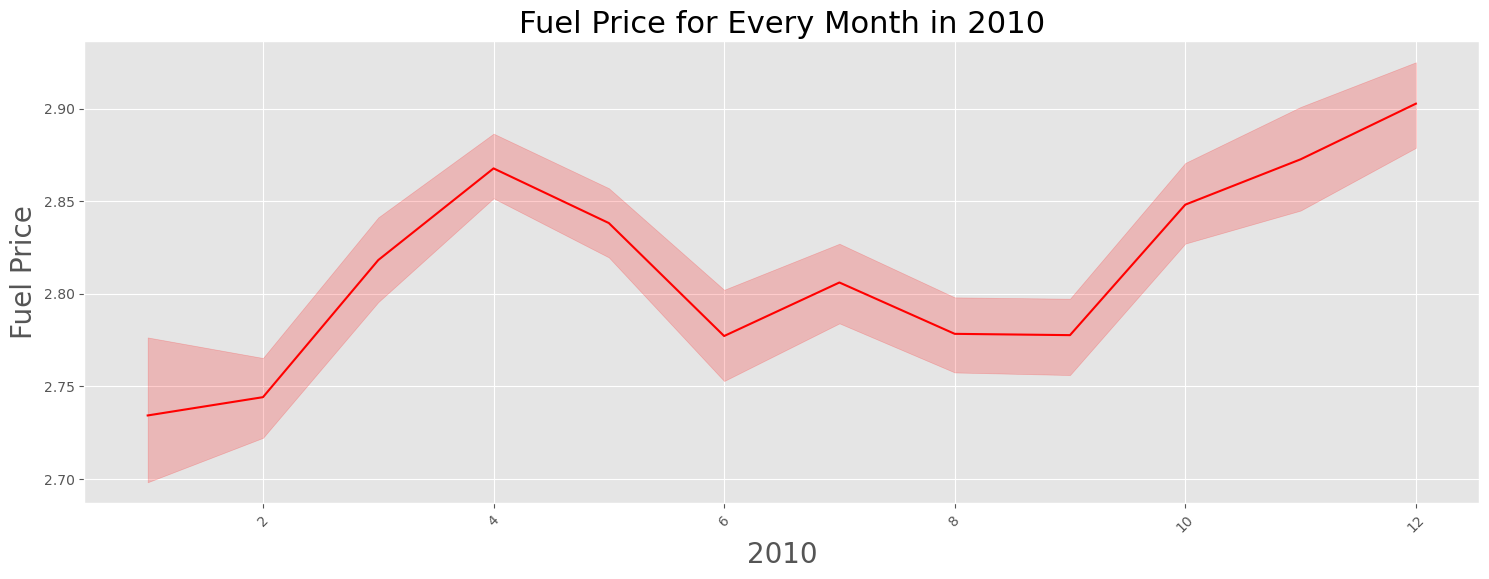

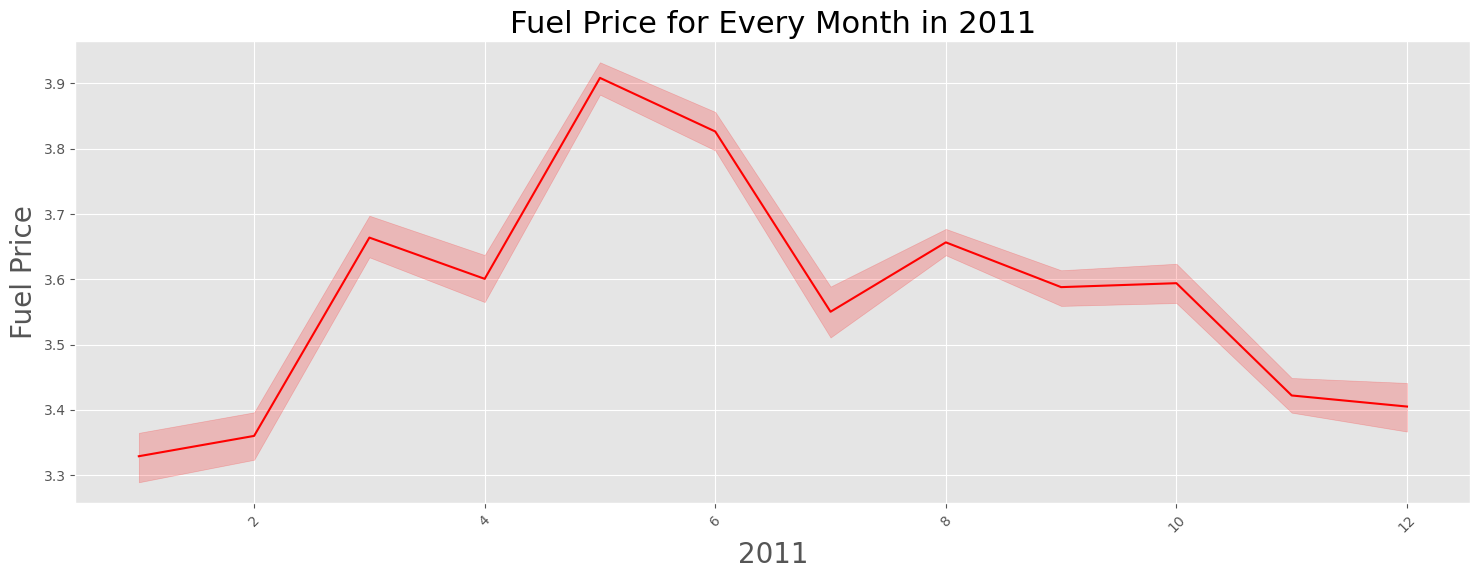

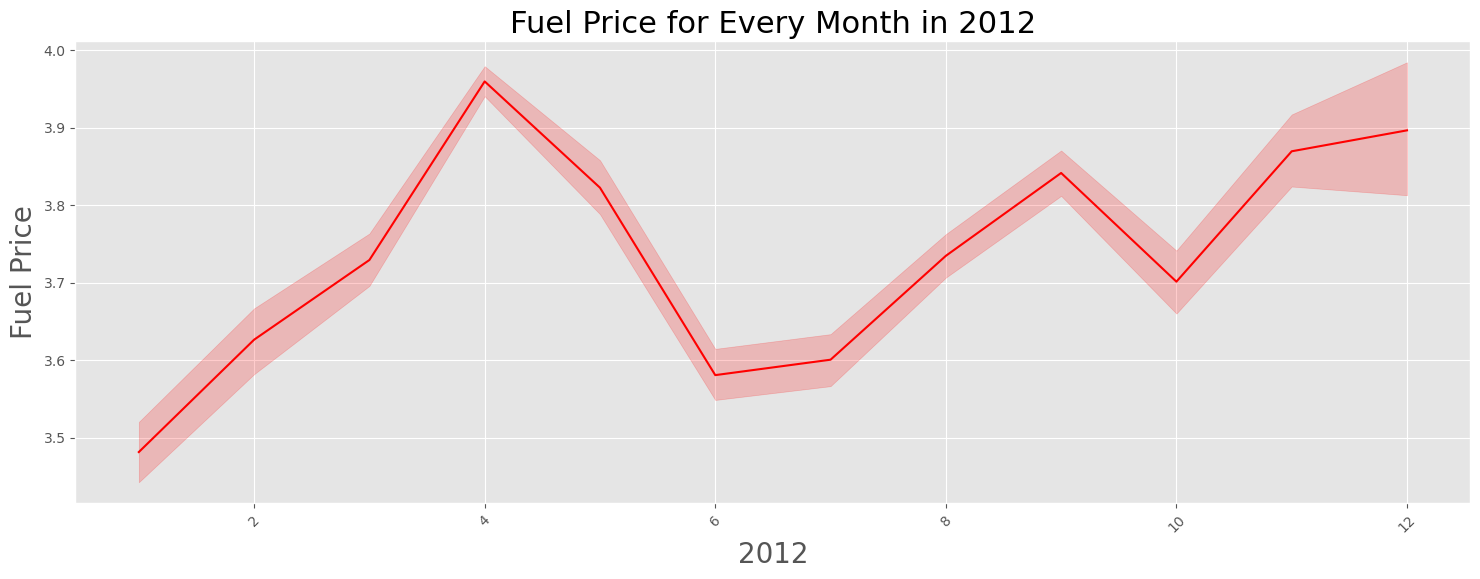

In [51]:
def fuel_price_in_each_year(year):
    plt.figure(figsize = (18, 6))
    plt.xticks(rotation = 45)
    sns.lineplot(data = data[data['year'] == year],
                 x = 'month',
                 y = 'fuel_price',
                 color = 'r')
    # Add labels and title
    plt.title(f'Fuel Price for Every Month in {year}', size = 22)
    plt.xlabel(year, size = 20)
    plt.ylabel('Fuel Price', size = 20)
    plt.show()
    
    
plt.figure(figsize = (18, 6))
plt.xticks(rotation = 45)
sns.lineplot(data = data,
             x = 'date',
             y = 'fuel_price',
             color = 'r')
# Add labels and title
plt.title(f'Fuel Price Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Fuel Price', size = 20)
plt.show() 
    
    
fuel_price_in_each_year(2010)
fuel_price_in_each_year(2011)
fuel_price_in_each_year(2012)

**Conclusion:** The fuel price increases over time.

In [52]:
'''
fig = px.histogram(data, 
             x = 'month', 
             y = 'weekly_sales', 
             color = 'year', 
             title = 'Total Sales for each Month in each Year', 
             nbins = 30)
fig.update_layout(xaxis_title = 'Month', yaxis_title = 'Total Sales')
fig.show()
'''




'''
fig = px.histogram(data, 
             x = 'year', 
             y = 'weekly_sales', 
             color = 'quarter', 
             title = 'Total Sales for each Quarter in each Year', 
             nbins = 8)
fig.update_layout(xaxis_title = 'Month', yaxis_title = 'Total Sales')
fig.show()
'''




'''
def aaa(year):    
    gbts = data[data['year'] == year].groupby('month').sum()['weekly_sales']
    gbts = gbts.reset_index()
    fig = px.line(gbts, 
                  x = 'month',
                  y = 'weekly_sales',
                  title = f'Total Sales for each Month in {year}',
                  width = 950, height = 400)
    fig.show()
'''

"\ndef aaa(year):    \n    gbts = data[data['year'] == year].groupby('month').sum()['weekly_sales']\n    gbts = gbts.reset_index()\n    fig = px.line(gbts, \n                  x = 'month',\n                  y = 'weekly_sales',\n                  title = f'Total Sales for each Month in {year}',\n                  width = 950, height = 400)\n    fig.show()\n"

---

---

# Data Correlation

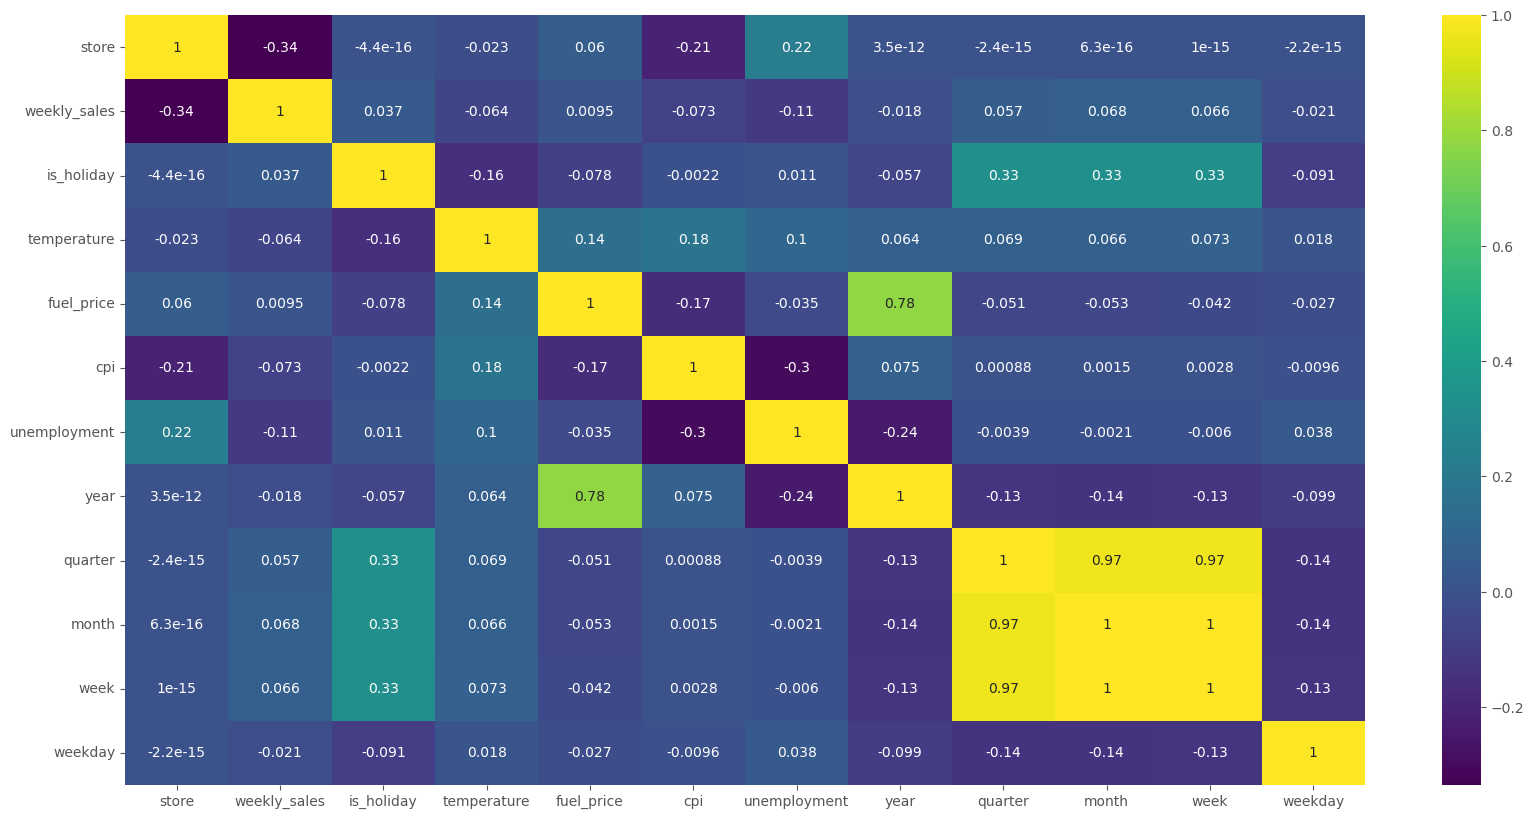

In [53]:
# Heatmap to explain the correlation between the features
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, cmap='viridis')
plt.show()

---

---

# Data Pre-processing

### 1. Dropping the unnecessary columns

In [54]:
data.sample(3)

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,quarter,month,week,weekday
4869,35,2010-03-26,"1,078,900",0,52,3,136,9,2010,1,3,12,4
820,6,2012-10-02,"1,620,604",1,49,3,222,6,2012,4,10,40,1
5937,42,2011-08-07,"593,234",0,89,4,129,8,2011,3,8,31,6


In [55]:
data = data.drop(['date'], axis = 1)

data.sample(3)

,store,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,quarter,month,week,weekday
840,6,"1,648,863",0,87,3,223,6,2012,2,6,26,4
5848,41,"1,347,176",0,74,4,198,6,2012,3,7,29,4
2273,16,"565,298",0,68,4,198,6,2012,3,7,29,4


### 2. Detecting and Removing the outliers

0 temperature
1 fuel_price
2 cpi
3 unemployment


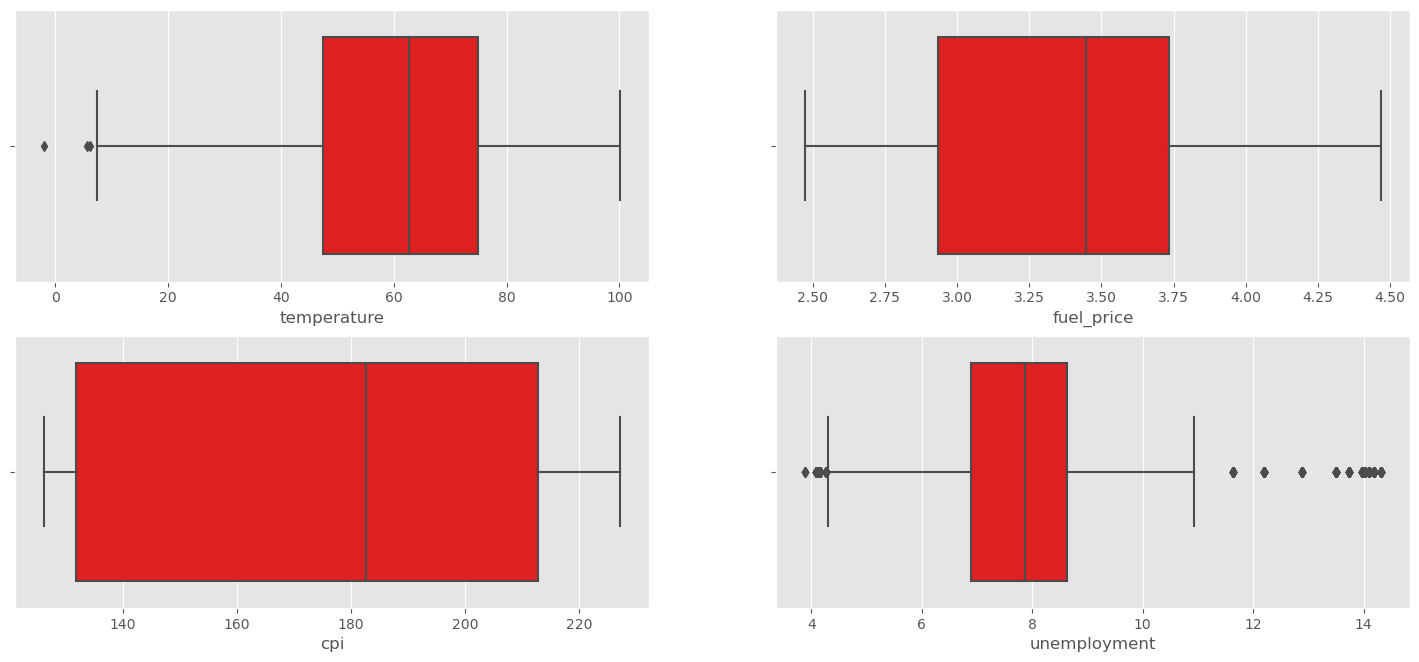

Number of data rows:  6435


In [56]:
col = ['temperature', 'fuel_price', 'cpi', 'unemployment'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(data = data, x = v, color = 'red')
plt.show()

print('Number of data rows: ', data.shape[0])

In [57]:
# Remove outliers from the temperature column
data.drop(data[data['temperature'] < 7].index, axis = 0, inplace = True)

In [58]:
# Remove outliers from the unemployment column
data.drop(data[data['unemployment'] < 4.4].index, axis = 0, inplace = True)
data.drop(data[data['unemployment'] > 11].index, axis = 0, inplace = True)

0 temperature
1 fuel_price
2 cpi
3 unemployment


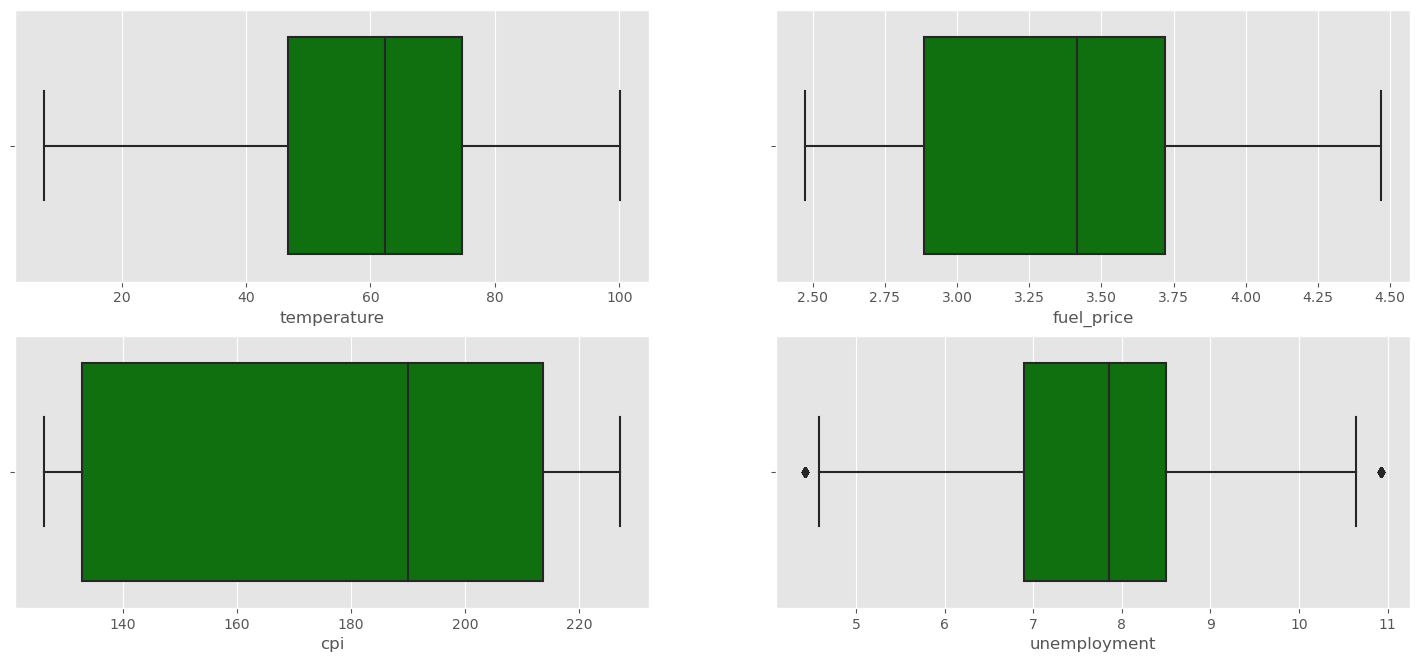

Number of data rows:  5938


In [59]:
col = ['temperature', 'fuel_price', 'cpi', 'unemployment'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(data = data, x = v, color = 'g')
plt.show()

print('Number of data rows: ', data.shape[0])

### 3. Splitting the data to training data and testing data

In [60]:
X = data.drop('weekly_sales', axis = 1)
y = data['weekly_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
print('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5938, 11)
Shape of train data:  (4750, 11)
Shape of test data :  (1188, 11)


### 4. Data Transformation

In [62]:
# let's handle store and holiday columns as categorical features, so we should convert them into categories (objects).
data['store'] = data['store'].astype('object')
data['is_holiday'] = data['is_holiday'].astype('object')

In [63]:
# Splitting the data into Numerical Features and Categorical Features
num_features = list(data.select_dtypes('number'))
num_features.remove('weekly_sales')

cat_features = list(data.select_dtypes('object'))

print(f'Numerical Features  : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features  : ['temperature', 'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'month', 'week', 'weekday']
Categorical Features: ['store', 'is_holiday']


In [64]:
# data transformation pipeline
preprocessor = ColumnTransformer([
                                  ('num_features', StandardScaler(), num_features), 
                                  ('cat_features', OrdinalEncoder(), cat_features),
                                ])

# Fitting the training data               
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['temperature', 'fuel_price', 'cpi',
                                  'unemployment', 'year', 'quarter', 'month',
                                  'week', 'weekday']),
                                ('cat_features', OrdinalEncoder(),
                                 ['store', 'is_holiday'])])

In [65]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

# ML Model

## 1. Linear Regression

In [66]:
# Linear Regression Model
LR = LinearRegression()

# Model Fitting
LR.fit(X_train_transformed, y_train)

LinearRegression()

In [67]:
# Training Accuracy
LR_pred_train_data = LR.predict(X_train_transformed)

print("Training Accuracy of Linear Regression: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, LR_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, LR_pred_train_data) * 100, 2)} %')

Training Accuracy of Linear Regression: 

Root Mean Squared  Error :  530933.6659355492
R-Squere score Training  :  13.23 %


**Conclusion:** The model didn't learn enough, so we need to increase the complexity of this model.  let's do Polynomial Features for the data before modeling.

In [68]:
# Linear Regression Model with Polynomial Features
LR_pipe = Pipeline([('poly_feat', PolynomialFeatures(degree = 2)),
                    ('lin_reg', LinearRegression())])

# Model Fitting
LR_pipe.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_feat', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [69]:
# Training Accuracy
LR_pred_train_data = LR.predict(X_train_transformed)

print("Training Accuracy of Linear Regression: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, LR_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, LR_pred_train_data) * 100, 2)} %')

Training Accuracy of Linear Regression: 

Root Mean Squared  Error :  530933.6659355492
R-Squere score Training  :  13.23 %


In [70]:
# Define the parameter grid to search
param_grid = {'poly_feat__degree': [2, 3, 4]}

# Perform grid search
grid_search_LR = GridSearchCV(estimator = LR_pipe, param_grid = param_grid, scoring = 'r2', cv = 5)
grid_search_LR.fit(X_train_transformed, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search_LR.best_params_)
print('Best score     : ', grid_search_LR.best_score_)

Best parameters:  {'poly_feat__degree': 3}
Best score     :  0.3467009077615593


In [71]:
# Linear Regression Model with Polynomial Features after tuning the Hyperparameters
LR_pipe  = Pipeline([('poly_feat', PolynomialFeatures(degree = 3)),
                     ('lin_reg', LinearRegression())])
                   
# Fitting the Linear Regression to the training data
LR_pipe.fit(X_train_transformed, y_train)

# Training Accuracy after tuning the Hyperparameters
LR_pred_train_data = LR_pipe.predict(X_train_transformed)
print("Training Accuracy of Linear Regression: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, LR_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, LR_pred_train_data) * 100, 2)} %')

Training Accuracy of Linear Regression: 

Root Mean Squared  Error :  425563.00318931334
R-Squere score Training  :  44.26 %


In [72]:
# Cross Validation for Linear Regression Model
LR_pipe_scores = cross_val_score(LR_pipe, X_train_transformed, y_train, scoring = 'r2', cv = 5)

print(f'Linear Regression Accuracy          :  {LR_pipe_scores}')
print(f'Linear Regression Standard Deviation:  {round(LR_pipe_scores.std(), 2)}')
print(f'Linear Regression Accuracy Mean     :  {round(LR_pipe_scores.mean() * 100, 2)} %')

Linear Regression Accuracy          :  [0.31401581 0.38477405 0.31022499 0.32780839 0.39668131]
Linear Regression Standard Deviation:  0.04
Linear Regression Accuracy Mean     :  34.67 %


In [73]:
# Testing Accuracy
LR_pred_test_data = LR_pipe.predict(X_test_transformed)

print("Testing Accuracy of Ridge Regressor: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, LR_pred_test_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_test, LR_pred_test_data) * 100, 2)} %')

Testing Accuracy of Ridge Regressor: 

Root Mean Squared  Error :  430354.8320679133
R-Squere score Training  :  43.37 %


**Conclusion:** The model didn't learn enough after tuning the degree of PolynomialFeatures(), so let's use another algorithm like Ridge.

## 2. Ridge

In [74]:
# Ridge Model with Polynomial Features
Ridge_pipe = Pipeline([('poly_feat', PolynomialFeatures(degree = 3)),
                       ('ridge', Ridge(alpha = 0.5))])
                   
# Fitting the ridge to the training data
Ridge_pipe.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=0.5))])

In [75]:
# Training Accuracy
Ridge_pred_train_data = Ridge_pipe.predict(X_train_transformed)

print("Training Accuracy of Ridge: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, Ridge_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, Ridge_pred_train_data) * 100, 2)} %')

Training Accuracy of Ridge: 

Root Mean Squared  Error :  428023.6706234779
R-Squere score Training  :  43.61 %


In [76]:
# Define the parameter grid to search
param_grid = {'poly_feat__degree': [2, 3, 4, 5], 
              'ridge__alpha': [0.1, 0.5, 1, 2, 3]}

# Perform grid search
grid_search_Ridge = GridSearchCV(estimator = Ridge_pipe, param_grid = param_grid, scoring = 'r2', cv = 5)
grid_search_Ridge.fit(X_train_transformed, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search_Ridge.best_params_)
print('Best score     : ', grid_search_Ridge.best_score_)

Best parameters:  {'poly_feat__degree': 4, 'ridge__alpha': 0.5}
Best score     :  0.48129579364447983


In [77]:
# Ridge Model with Polynomial Features after tuning the Hyperparameters
Ridge_pipe  = Pipeline([('poly_feat', PolynomialFeatures(degree = 4)),
                        ('ridge', Ridge(alpha = 0.5))])
                   
# Fitting the ridge to the training data
Ridge_pipe.fit(X_train_transformed, y_train)

# Training Accuracy after tuning the Hyperparameters
Ridge_pred_train_data = Ridge_pipe.predict(X_train_transformed)
print("Training Accuracy of Ridge: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, Ridge_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, Ridge_pred_train_data) * 100, 2)} %')

Training Accuracy of Ridge: 

Root Mean Squared  Error :  310470.95403486746
R-Squere score Training  :  70.33 %


In [78]:
# Cross Validation for Rideg Model
Ridge_pipe_scores = cross_val_score(Ridge_pipe, X_train_transformed, y_train, scoring = 'r2', cv = 5)

print(f'Ridge Accuracy          :  {Ridge_pipe_scores}')
print(f'Ridge Standard Deviation:  {round(Ridge_pipe_scores.std(), 2)}')
print(f'Ridge Accuracy Mean     :  {round(Ridge_pipe_scores.mean() * 100, 2)} %')

Ridge Accuracy          :  [0.46478636 0.48550122 0.48316381 0.46205711 0.51097047]
Ridge Standard Deviation:  0.02
Ridge Accuracy Mean     :  48.13 %


In [79]:
# Testing Accuracy
Ridge_pred_test_data = Ridge_pipe.predict(X_test_transformed)

print("Testing Accuracy of Ridge Regressor: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, Ridge_pred_test_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_test, Ridge_pred_test_data) * 100, 2)} %')

Testing Accuracy of Ridge Regressor: 

Root Mean Squared  Error :  380861.8279443843
R-Squere score Training  :  55.64 %


**Conclusion:** Ridge model didn't learn enough after tuning the degree of PolynomialFeatures() and the alpha of Ridge(), so let's use another algorithm like Lasso.

## 3.Lasso

In [80]:
# Lasso Regression Model with Polynomial Features
Lasso_pipe = Pipeline([('poly_feat', PolynomialFeatures(degree = 3)),
                  ('lasso', Lasso(alpha = 0.5))])
                   
# Fitting the ridge to the training data
Lasso_pipe.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=3)),
                ('lasso', Lasso(alpha=0.5))])

In [81]:
# Training Accuracy
Lasso_pred_train_data = Lasso_pipe.predict(X_train_transformed)

print("Training Accuracy of Lasso: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, Lasso_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, Lasso_pred_train_data) * 100, 2)} %')

Training Accuracy of Lasso: 

Root Mean Squared  Error :  430221.53519878857
R-Squere score Training  :  43.03 %


In [82]:
# Define the parameter grid to search
param_grid = {'poly_feat__degree': [1, 2, 3, 4, 5], 
              'lasso__alpha': [0.1, 0.5, 1, 3, 5]}

# Perform grid search
grid_search_Lassa = GridSearchCV(estimator = Lasso_pipe, param_grid = param_grid, scoring = 'r2', cv = 5)
grid_search_Lassa.fit(X_train_transformed, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search_Lassa.best_params_)
print('Best score     : ', grid_search_Lassa.best_score_)

Best parameters:  {'lasso__alpha': 5, 'poly_feat__degree': 4}
Best score     :  0.38065591392089526


In [83]:
# Lasso Model with Polynomial Features after tuning the Hyperparameters
Lasso_pipe  = Pipeline([('poly_feat', PolynomialFeatures(degree = 4)),
                        ('lasso', Ridge(alpha = 5))])
                   
# Fitting the Lasso to the training data
Lasso_pipe.fit(X_train_transformed, y_train)

# Training Accuracy after tuning the Hyperparameters
Lasso_pred_train_data = Lasso_pipe.predict(X_train_transformed)
print("Training Accuracy of Lasso: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, Lasso_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, Lasso_pred_train_data) * 100, 2)} %')

Training Accuracy of Lasso: 

Root Mean Squared  Error :  341994.2320608613
R-Squere score Training  :  64.0 %


In [84]:
# Cross Validation for Lasso Model
Lasso_pipe_scores = cross_val_score(Lasso_pipe, X_train_transformed, y_train, scoring = 'r2', cv = 5)

print(f'Lasso Accuracy          :  {Ridge_pipe_scores}')
print(f'Lasso Standard Deviation:  {round(Lasso_pipe_scores.std(), 2)}')
print(f'Lasso Accuracy Mean     :  {round(Lasso_pipe_scores.mean() * 100, 2)} %')

Lasso Accuracy          :  [0.46478636 0.48550122 0.48316381 0.46205711 0.51097047]
Lasso Standard Deviation:  0.03
Lasso Accuracy Mean     :  43.78 %


In [85]:
# Testing Accuracy
Lasso_pred_test_data = Lasso_pipe.predict(X_test_transformed)

print("Testing Accuracy of Lasso Regressor: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, Lasso_pred_test_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_test, Lasso_pred_test_data) * 100, 2)} %')

Testing Accuracy of Lasso Regressor: 

Root Mean Squared  Error :  403384.1909480649
R-Squere score Training  :  50.24 %


**Conclusion:** Lasso model didn't learn enough after tuning the degree of PolynomialFeatures() and the alpha of Lasso(), so let's use another algorithm like SVR.

## 4.Support Vector Regression (SVR)

In [86]:
# SVR Model with linear kernel
SVR = SVR(kernel = 'linear')

# Fitting the SVR to the training data
SVR.fit(X_train_transformed, y_train)

SVR(kernel='linear')

In [87]:
# Training Accuracy
SVR_pred_train_data = SVR.predict(X_train)

print("Training Accuracy of SVR: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, SVR_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, SVR_pred_train_data) * 100, 2)} %')

Training Accuracy of SVR: 

Root Mean Squared  Error :  633447.7557980103
R-Squere score Training  :  -23.51 %


In [89]:
# SVR Model with RBF kernel
SVR = SVR(kernel = 'rbf')

# Fitting the SVR to the training data
SVR.fit(X_train_transformed, y_train)

# Training Accuracy
SVR_pred_train_data = SVR.predict(X_train_transformed)
print("Training Accuracy of SVR: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, SVR_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, SVR_pred_train_data) * 100, 2)} %')

Training Accuracy of SVR: 

Root Mean Squared  Error :  578055.8705863119
R-Squere score Training  :  -2.85 %


In [90]:
# Define the parameter grid to search
param_grid = {'kernel' : ['ploy', 'rbf'],
              'degree' : [2, 3, 4, 5],
              'epsilon': [1, 5, 10, 15],
                'C'    : [5, 10, 100, 1000, 3000]}

# Perform grid search
grid_search_SVR = GridSearchCV(estimator = SVR, param_grid = param_grid, cv = 5)
grid_search_SVR.fit(X_train_transformed, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search_SVR.best_params_)
print('Best score     : ', grid_search_SVR.best_score_)

Best parameters:  {'C': 3000, 'degree': 2, 'epsilon': 1, 'kernel': 'rbf'}
Best score     :  0.10097791113091537


In [92]:
# SVR Model with RBF kernel after tuning the Hyperparameters
SVR = SVR(kernel = 'rbf', C = 3000, degree =  2, epsilon = 1)

# Fitting the SVR to the training data
SVR.fit(X_train_transformed, y_train)

# Training Accuracy after tuning the Hyperparameters
SVR_pred_train_data = SVR.predict(X_train_transformed)
print("Training Accuracy of SVR: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, SVR_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, SVR_pred_train_data) * 100, 2)} %')

Training Accuracy of SVR: 

Root Mean Squared  Error :  539354.7834241561
R-Squere score Training  :  10.46 %


In [94]:
# Testing Accuracy after tuning hyperparameters
SVR_pred_test_data = SVR.predict(X_test_transformed)

print("Testing Accuracy of SVR Regressor: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, SVR_pred_test_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_test, SVR_pred_test_data) * 100, 2)} %')

Testing Accuracy of SVR Regressor: 

Root Mean Squared  Error :  536300.809901188
R-Squere score Training  :  12.05 %


**Conclusion:** The SVR model did not learn enough even after tuning its hyperparameters, so let's use another algorithm like KNN Regressor.

## 4. KNN Regressor

In [95]:
# KNN Regression Model
KNN_Reg = KNeighborsRegressor(n_neighbors = 5)
                   
# Fitting the KNN_Reg to the training data
KNN_Reg.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [96]:
# Training Accuracy
KNN_Reg_pred_train_data = KNN_Reg.predict(X_train_transformed)

print("Training Accuracy of KNN Regressor: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, KNN_Reg_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, KNN_Reg_pred_train_data) * 100, 2)} %')

Training Accuracy of KNN Regressor: 

Root Mean Squared  Error :  180922.60716933096
R-Squere score Training  :  89.92 %


In [97]:
# Define the parameter grid to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15]}

# Perform grid search
grid_search_KNN = GridSearchCV(estimator = KNN_Reg, param_grid = param_grid, cv = 5)
grid_search_KNN.fit(X_train_transformed, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search_KNN.best_params_)
print('Best score     : ', grid_search_KNN.best_score_)

Best parameters:  {'n_neighbors': 3}
Best score     :  0.8239153335077141


In [98]:
# KNN Regression Model after tuning hyperparameters
KNN_Reg = KNeighborsRegressor(n_neighbors = 3)
                   
# Fitting the KNN_Reg to the training data
KNN_Reg.fit(X_train_transformed, y_train)

# Training Accuracy after tuning hyperparameters
KNN_pred_train_data = KNN_Reg.predict(X_train_transformed)

print("Training Accuracy of KNN Regressor: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, KNN_pred_train_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_train, KNN_pred_train_data) * 100, 2)} %')

Training Accuracy of KNN Regressor: 

Root Mean Squared  Error :  161746.16479979875
R-Squere score Training  :  91.95 %


In [99]:
# Cross Validation for Lasso Model
KNN_scores = cross_val_score(KNN_Reg, X_train_transformed, y_train, scoring = 'r2', cv = 5)

print(f'Lasso Accuracy          :  {KNN_scores}')
print(f'Lasso Standard Deviation:  {round(KNN_scores.std(), 2)}')
print(f'Lasso Accuracy Mean     :  {round(KNN_scores.mean() * 100, 2)} %')

Lasso Accuracy          :  [0.79856191 0.83050686 0.81165922 0.85038795 0.82846073]
Lasso Standard Deviation:  0.02
Lasso Accuracy Mean     :  82.39 %


In [101]:
# Testing Accuracy after tuning hyperparameters
KNN_pred_test_data = KNN_Reg.predict(X_test_transformed)

print("Testing Accuracy of KNN Regressor: \n")
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, KNN_pred_test_data))}')
print(f'R-Squere score Training  :  {round(r2_score(y_test, KNN_pred_test_data) * 100, 2)} %')

Testing Accuracy of KNN Regressor: 

Root Mean Squared  Error :  247095.89907848512
R-Squere score Training  :  81.33 %


**Conclusion:** The KNN Regressor model is the best with an accuracy of 81.5% in comparison to the above algorithm we used.